<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1251-1300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5129]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [5130]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

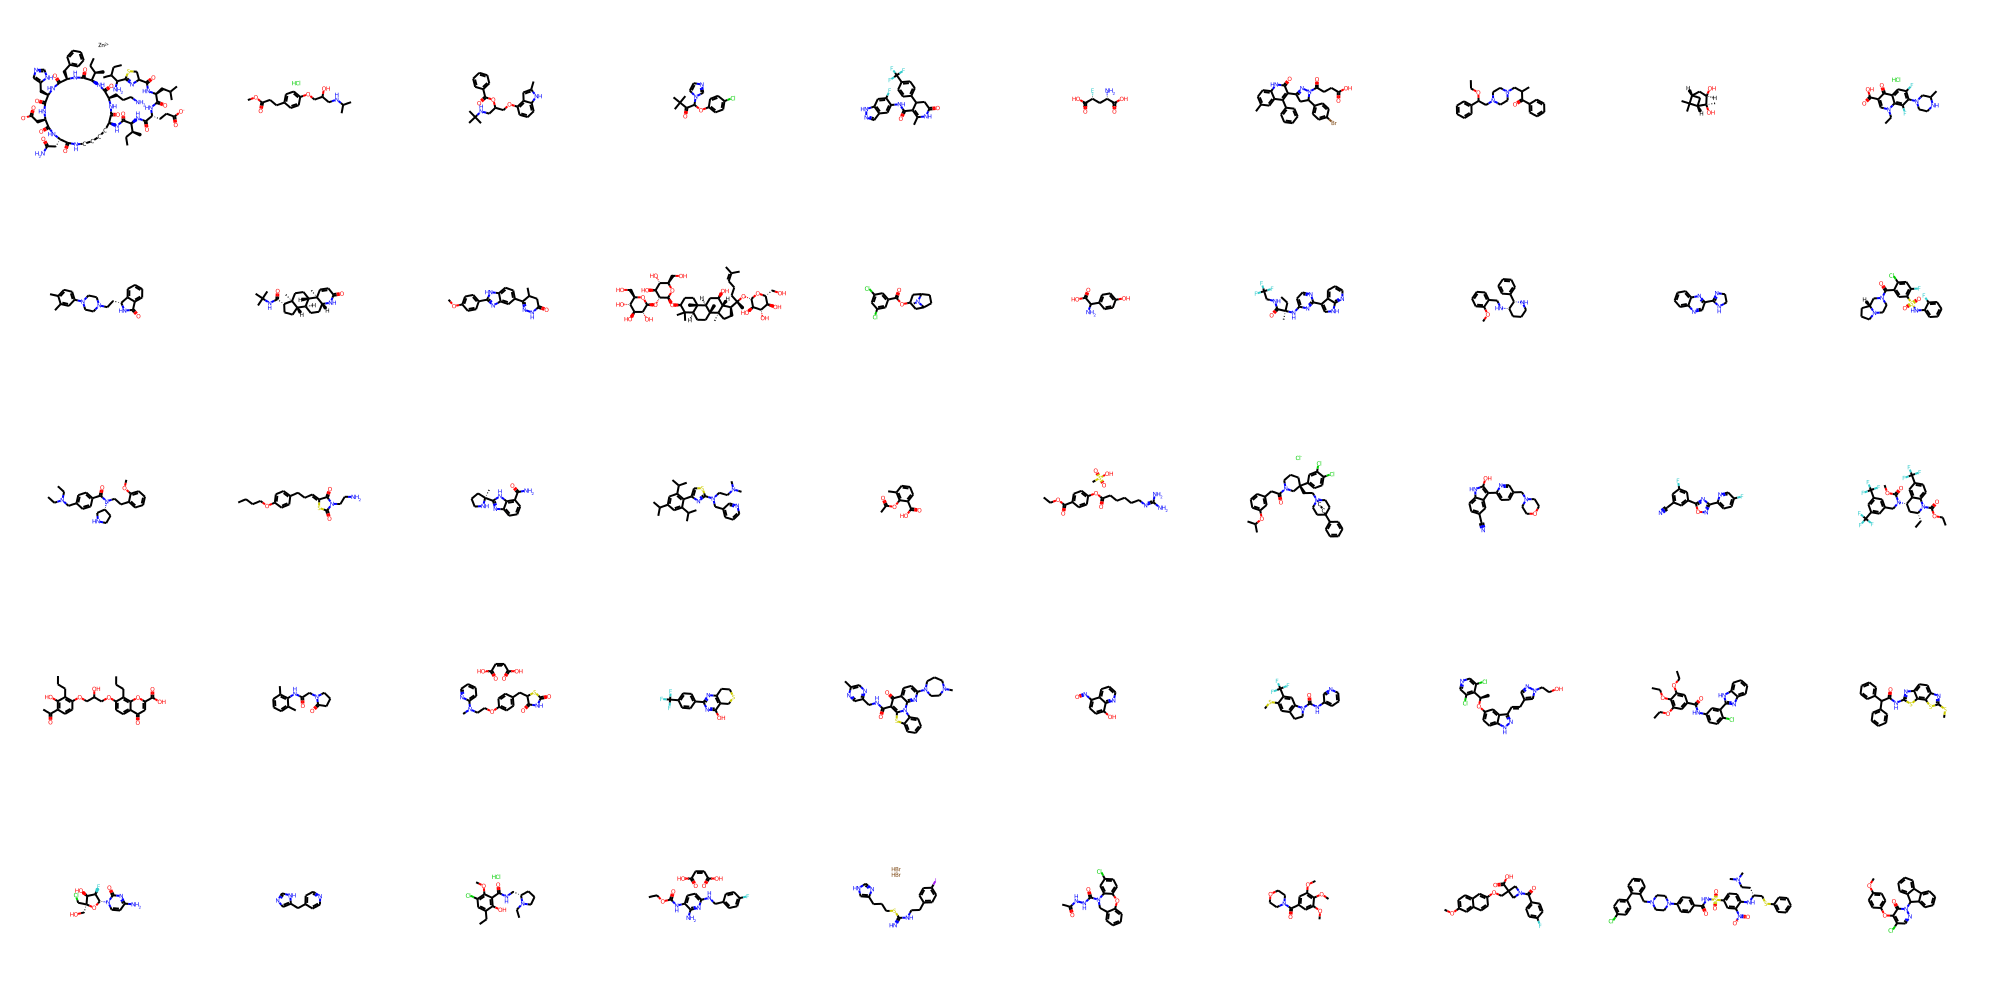

In [5131]:
smiles_list = [

'CCC(C)C(N)C1=NC(C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](CCC(=O)[O-])C(=O)N[C@H](C(=O)N[C@H]2CCCCNC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](CC(=O)[O-])NC(=O)[C@@H](Cc3cnc[nH]3)NC(=O)[C@@H](Cc3ccccc3)NC(=O)[C@@H]([C@H](C)CC)NC(=O)[C@@H](CCCN)NC2=O)[C@@H](C)CC)CS1.[Zn+2]',
'COC(=O)CCc1ccc(OCC(O)CNC(C)C)cc1.Cl',
'Cc1cc2c(OCC(CNC(C)(C)C)OC(=O)c3ccccc3)cccc2[nH]1',
'CC(C)(C)C(=O)C(Oc1ccc(Cl)cc1)n1ccnc1',
'CC1=C(C(=O)Nc2cc3cn[nH]c3cc2F)C(c2ccc(C(F)(F)F)cc2)CC(=O)N1',
'N[C@@H](C[C@@H](F)C(=O)O)C(=O)O',
'Cc1ccc2[nH]c(=O)c(C3=NN(C(=O)CCC(=O)O)C(c4ccc(Br)cc4)C3)c(-c3ccccc3)c2c1',
'CCOC(CN1CCN(CC(C)C(=O)c2ccccc2)CC1)c1ccccc1',
'CC1(C)[C@H]2C[C@@H]1[C@](C)(O)[C@H](O)C2',
'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c21.Cl',
'Cc1ccc(N2CCN(CC[C@H]3NC(=O)c4ccccc43)CC2)cc1C',
'CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(=O)C=C[C@]4(C)[C@H]3CC[C@]12C',
'COc1ccc(-c2nc3cc(C4=NNC(=O)CC4C)ccc3[nH]2)cc1',
'CC(C)=CCC[C@](C)(O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O)[C@H]1CC[C@]2(C)[C@@H]1[C@H](O)C[C@@H]1[C@@]3(C)CC[C@H](O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O)C(C)(C)[C@@H]3CC[C@]12C',
'CN1C2CCC1CC(OC(=O)c1cc(Cl)cc(Cl)c1)C2',
'NC(C(=O)O)c1ccc(O)cc1',
'CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)NCC(F)(F)F',
'COc1ccccc1CN[C@H]1CCCN[C@H]1c1ccccc1',
'c1ccc2nc(C3=NCCN3)cnc2c1',
'O=C(c1cc(S(=O)(=O)Nc2ccccc2F)c(F)cc1Cl)N1CCN2CCC[C@@H]2C1',
'CCN(CC)Cc1ccc(C(=O)N(CCc2ccccc2OC)[C@@H]2CCNC2)cc1',
'CCCCOc1ccc(CC/C=C2\SC(=O)N(CCN)C2=O)cc1',
'C[C@@]1(c2nc3cccc(C(N)=O)c3[nH]2)CCCN1',
'CC(C)c1cc(C(C)C)c(-c2csc(N(CCN(C)C)Cc3cccnc3)n2)c(C(C)C)c1',
'CC(=O)Oc1c(C)cccc1C(=O)O',
'CCOC(=O)c1ccc(OC(=O)CCCCCN=C(N)N)cc1.CS(=O)(=O)O',
'CC(C)Oc1cccc(CC(=O)N2CCC[C@](CC[N+]34CCC(c5ccccc5)(CC3)CC4)(c3ccc(Cl)c(Cl)c3)C2)c1.[Cl-]',
'N#Cc1ccc2[nH]c(O)c(-c3ccc(CN4CCOCC4)cn3)c2c1',
'N#Cc1cc(F)cc(-c2nc(-c3ccc(F)cn3)no2)c1',
'CCOC(=O)N1c2ccc(C(F)(F)F)cc2[C@@H](N(Cc2cc(C(F)(F)F)cc(C(F)(F)F)c2)C(=O)OC)C[C@H]1CC',
'CCCc1c(OCC(O)COc2ccc3c(=O)cc(C(=O)O)oc3c2CCC)ccc(C(C)=O)c1O',
'Cc1cccc(C)c1NC(=O)CN1CCCC1=O',
'CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1.O=C(O)/C=C\C(=O)O',
'Oc1nc(-c2ccc(C(F)(F)F)cc2)nc2c1CSCC2',
'Cc1cnc(CNC(=O)c2c(=O)c3ccc(N4CCCN(C)CC4)nc3n3c2sc2ccccc23)cn1',
'O=Nc1ccc(O)c2ncccc12',
'CSc1cc2c(cc1C(F)(F)F)N(C(=O)Nc1cccnc1)CC2',
'C[C@@H](Oc1ccc2[nH]nc(/C=C/c3cnn(CCO)c3)c2c1)c1c(Cl)cncc1Cl',
'CCOc1cc(C(=O)Nc2ccc(Cl)c(-c3nc4ccccc4[nH]3)c2)cc(OCC)c1OCC',
'CSc1nc2ccc3nc(NC(=O)C(c4ccccc4)c4ccccc4)sc3c2s1',
'Nc1ccn([C@@H]2O[C@@](CO)(CCl)[C@@H](O)[C@H]2F)c(=O)n1',
'c1cc(Cc2cnc[nH]2)ccn1',
'CCc1cc(Cl)c(OC)c(C(=O)NC[C@@H]2CCCN2CC)c1O.Cl',
'CCOC(=O)Nc1ccc(NCc2ccc(F)cc2)nc1N.O=C(O)/C=C\C(=O)O',
'Br.Br.N=C(NCCc1ccc(I)cc1)SCCCc1c[nH]cn1',
'CC(=O)NNC(=O)N1Cc2ccccc2Oc2ccc(Cl)cc21',
'COc1cc(C(=O)N2CCOCC2)cc(OC)c1OC',
'COc1ccc2cc(OCC3(C(=O)O)CN(C(=O)c4ccc(F)cc4)C3)ccc2c1',
'CN(C)CC[C@H](CSc1ccccc1)Nc1ccc(S(=O)(=O)NC(=O)c2ccc(N3CCN(Cc4ccccc4-c4ccc(Cl)cc4)CC3)cc2)cc1[N+](=O)[O-]',
'COc1ccc(Oc2c(Cl)cnn(C3c4ccccc4-c4ccccc43)c2=O)cc1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



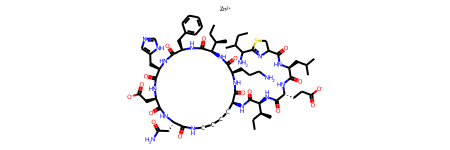

In [5132]:
M1 = mol_list [0]
M1

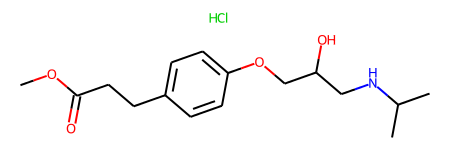

In [5133]:
M2 = mol_list [1]
M2

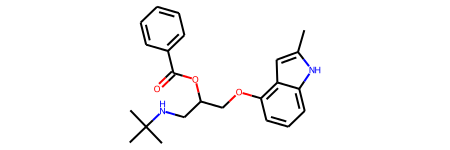

In [5134]:
M3 = mol_list [2]
M3

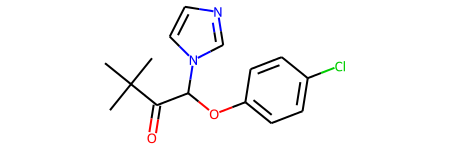

In [5135]:
M4 = mol_list [3]
M4

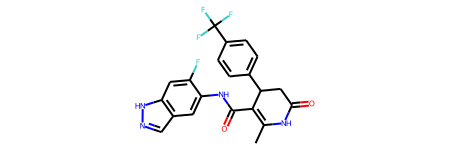

In [5136]:
M5 = mol_list [4]
M5

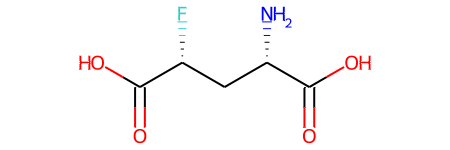

In [5137]:
M6 = mol_list [5]
M6

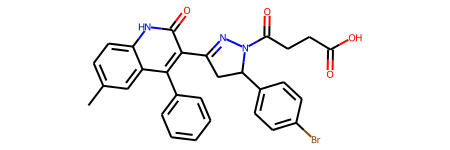

In [5138]:
M7 = mol_list [6]
M7

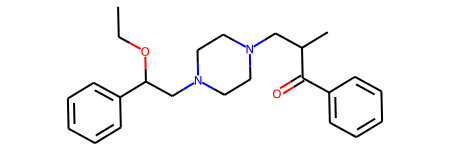

In [5139]:
M8 = mol_list [7]
M8

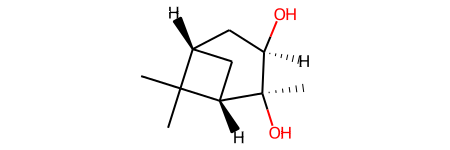

In [5140]:
M9 = mol_list [8]
M9

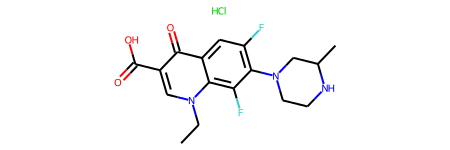

In [5141]:
M10 = mol_list [9]
M10

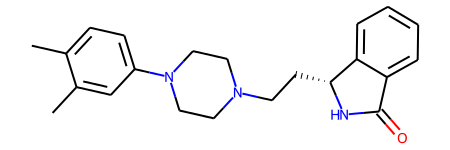

In [5142]:
M11 = mol_list [10]
M11

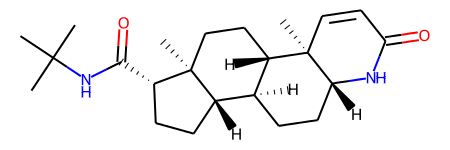

In [5143]:
M12 = mol_list [11]
M12

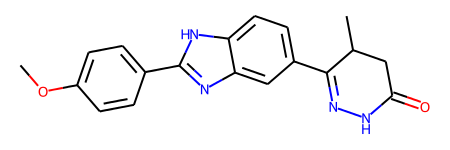

In [5144]:
M13 = mol_list [12]
M13

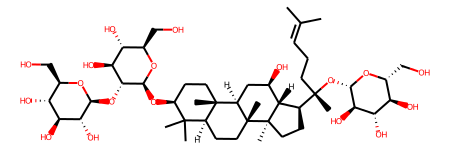

In [5145]:
M14 = mol_list [13]
M14

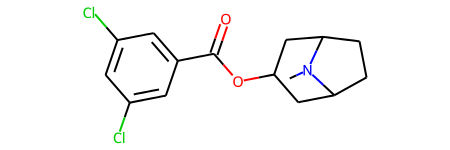

In [5146]:
M15 = mol_list [14]
M15

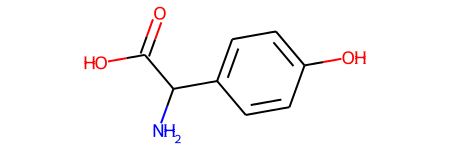

In [5147]:
M16 = mol_list [15]
M16

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


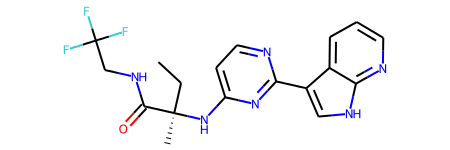

In [5148]:
M17 = mol_list [16]
M17

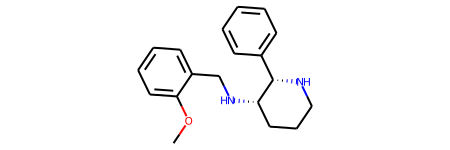

In [5149]:
M18 = mol_list [17]
M18

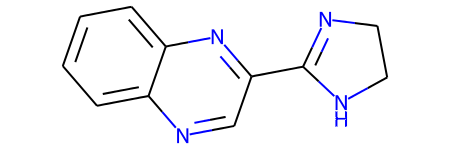

In [5150]:
M19 = mol_list [18]
M19

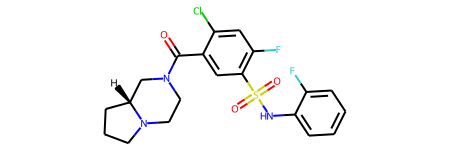

In [5151]:
M20 = mol_list [19]
M20

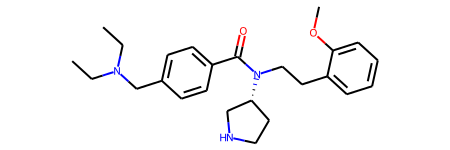

In [5152]:
M21 = mol_list [20]
M21

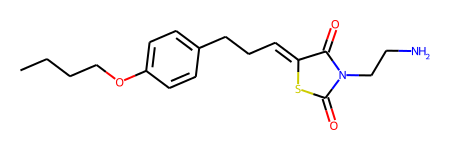

In [5153]:
M22 = mol_list [21]
M22

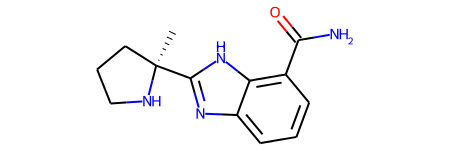

In [5154]:
M23 = mol_list [22]
M23

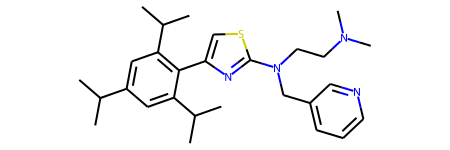

In [5155]:
M24 = mol_list [23]
M24

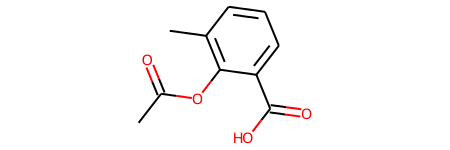

In [5156]:
M25 = mol_list [24]
M25

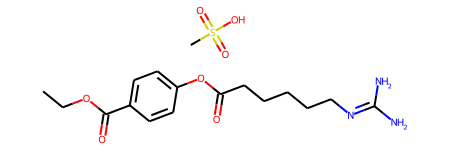

In [5157]:
M26 = mol_list [25]
M26

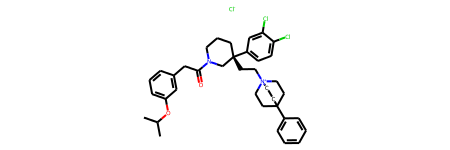

In [5158]:
M27 = mol_list [26]
M27

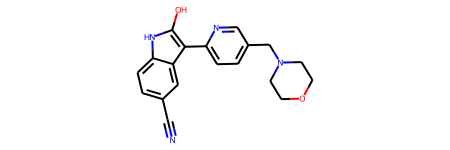

In [5159]:
M28 = mol_list [27]
M28

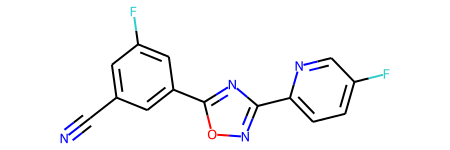

In [5160]:
M29 = mol_list [28]
M29

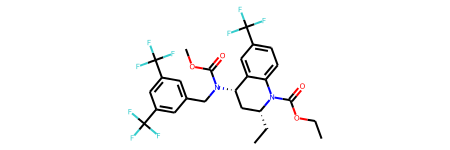

In [5161]:
M30 = mol_list [29]
M30

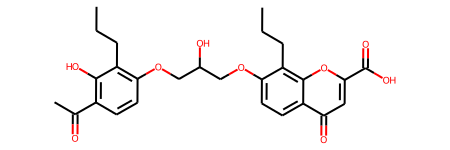

In [5162]:
M31 = mol_list [30]
M31

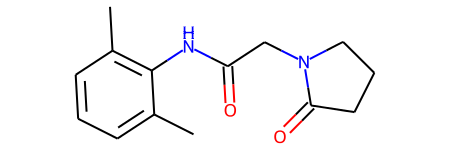

In [5163]:
M32 = mol_list [31]
M32

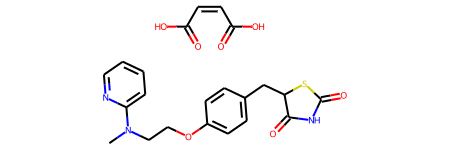

In [5164]:
M33 = mol_list [32]
M33

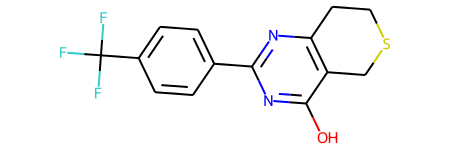

In [5165]:
M34 = mol_list [33]
M34

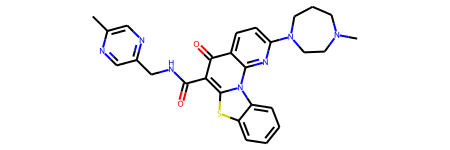

In [5166]:
M35 = mol_list [34]
M35

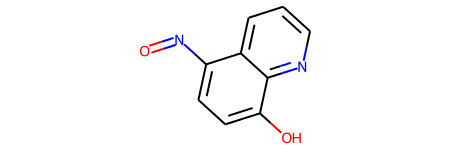

In [5167]:
M36 = mol_list [35]
M36

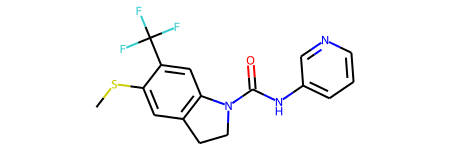

In [5168]:
M37= mol_list [36]
M37

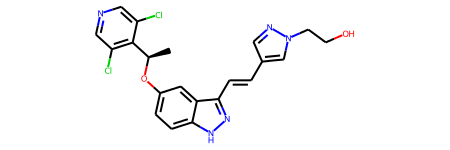

In [5169]:
M38= mol_list [37]
M38

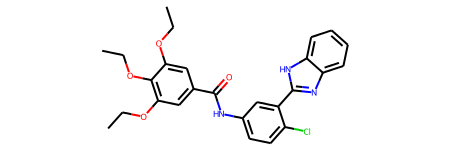

In [5170]:
M39= mol_list [38]
M39

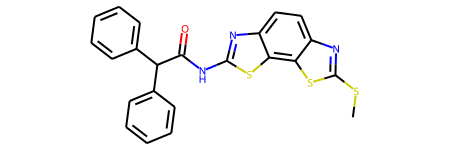

In [5171]:
M40= mol_list [39]
M40

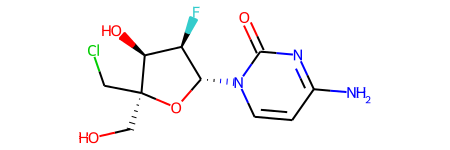

In [5172]:
M41= mol_list [40]
M41

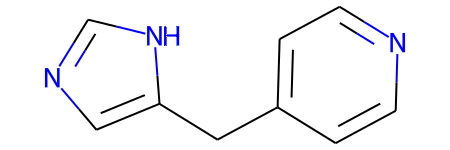

In [5173]:
M42= mol_list [41]
M42

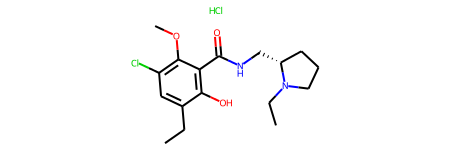

In [5174]:
M43= mol_list [42]
M43

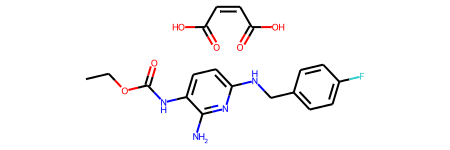

In [5175]:
M44= mol_list [43]
M44

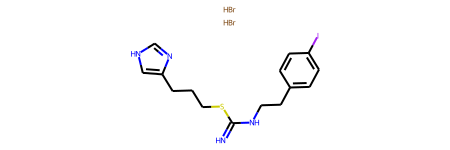

In [5176]:
M45= mol_list [44]
M45

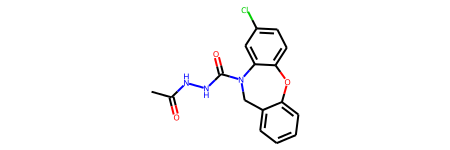

In [5177]:
M46= mol_list [45]
M46

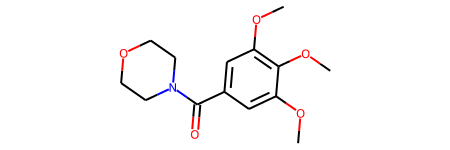

In [5178]:
M47= mol_list [46]
M47

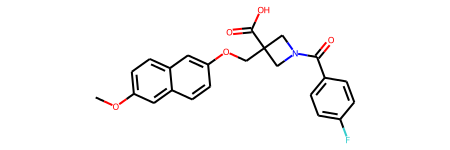

In [5179]:
M48= mol_list [47]
M48

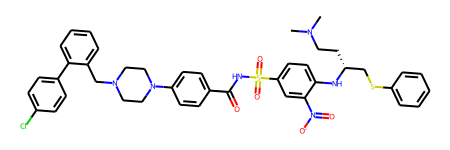

In [5180]:
M49= mol_list [48]
M49

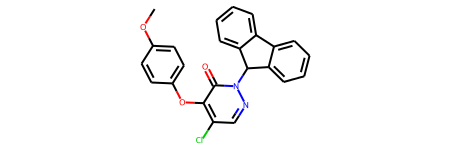

In [5181]:
M50= mol_list [49]
M50

In [5182]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 4,
 10,
 26,
 33,
 42,
 64,
 80,
 82,
 86,
 90,
 94,
 106,
 109,
 115,
 116,
 117,
 128,
 130,
 140,
 147,
 157,
 174,
 175,
 202,
 278,
 280,
 281,
 282,
 283,
 294,
 301,
 305,
 314,
 325,
 327,
 337,
 348,
 355,
 356,
 378,
 387,
 389,
 432,
 435,
 458,
 482,
 492,
 493,
 503,
 506,
 511,
 519,
 520,
 540,
 541,
 572,
 573,
 579,
 594,
 632,
 643,
 650,
 660,
 665,
 669,
 670,
 672,
 675,
 680,
 689,
 695,
 704,
 713,
 715,
 726,
 730,
 735,
 736,
 739,
 754,
 758,
 759,
 761,
 785,
 786,
 798,
 799,
 804,
 806,
 807,
 816,
 823,
 832,
 837,
 840,
 842,
 846,
 849,
 860,
 867,
 874,
 887,
 890,
 892,
 893,
 917,
 918,
 926,
 935,
 944,
 957,
 973,
 976,
 981,
 992,
 1004,
 1006,
 1009,
 1019,
 1020]

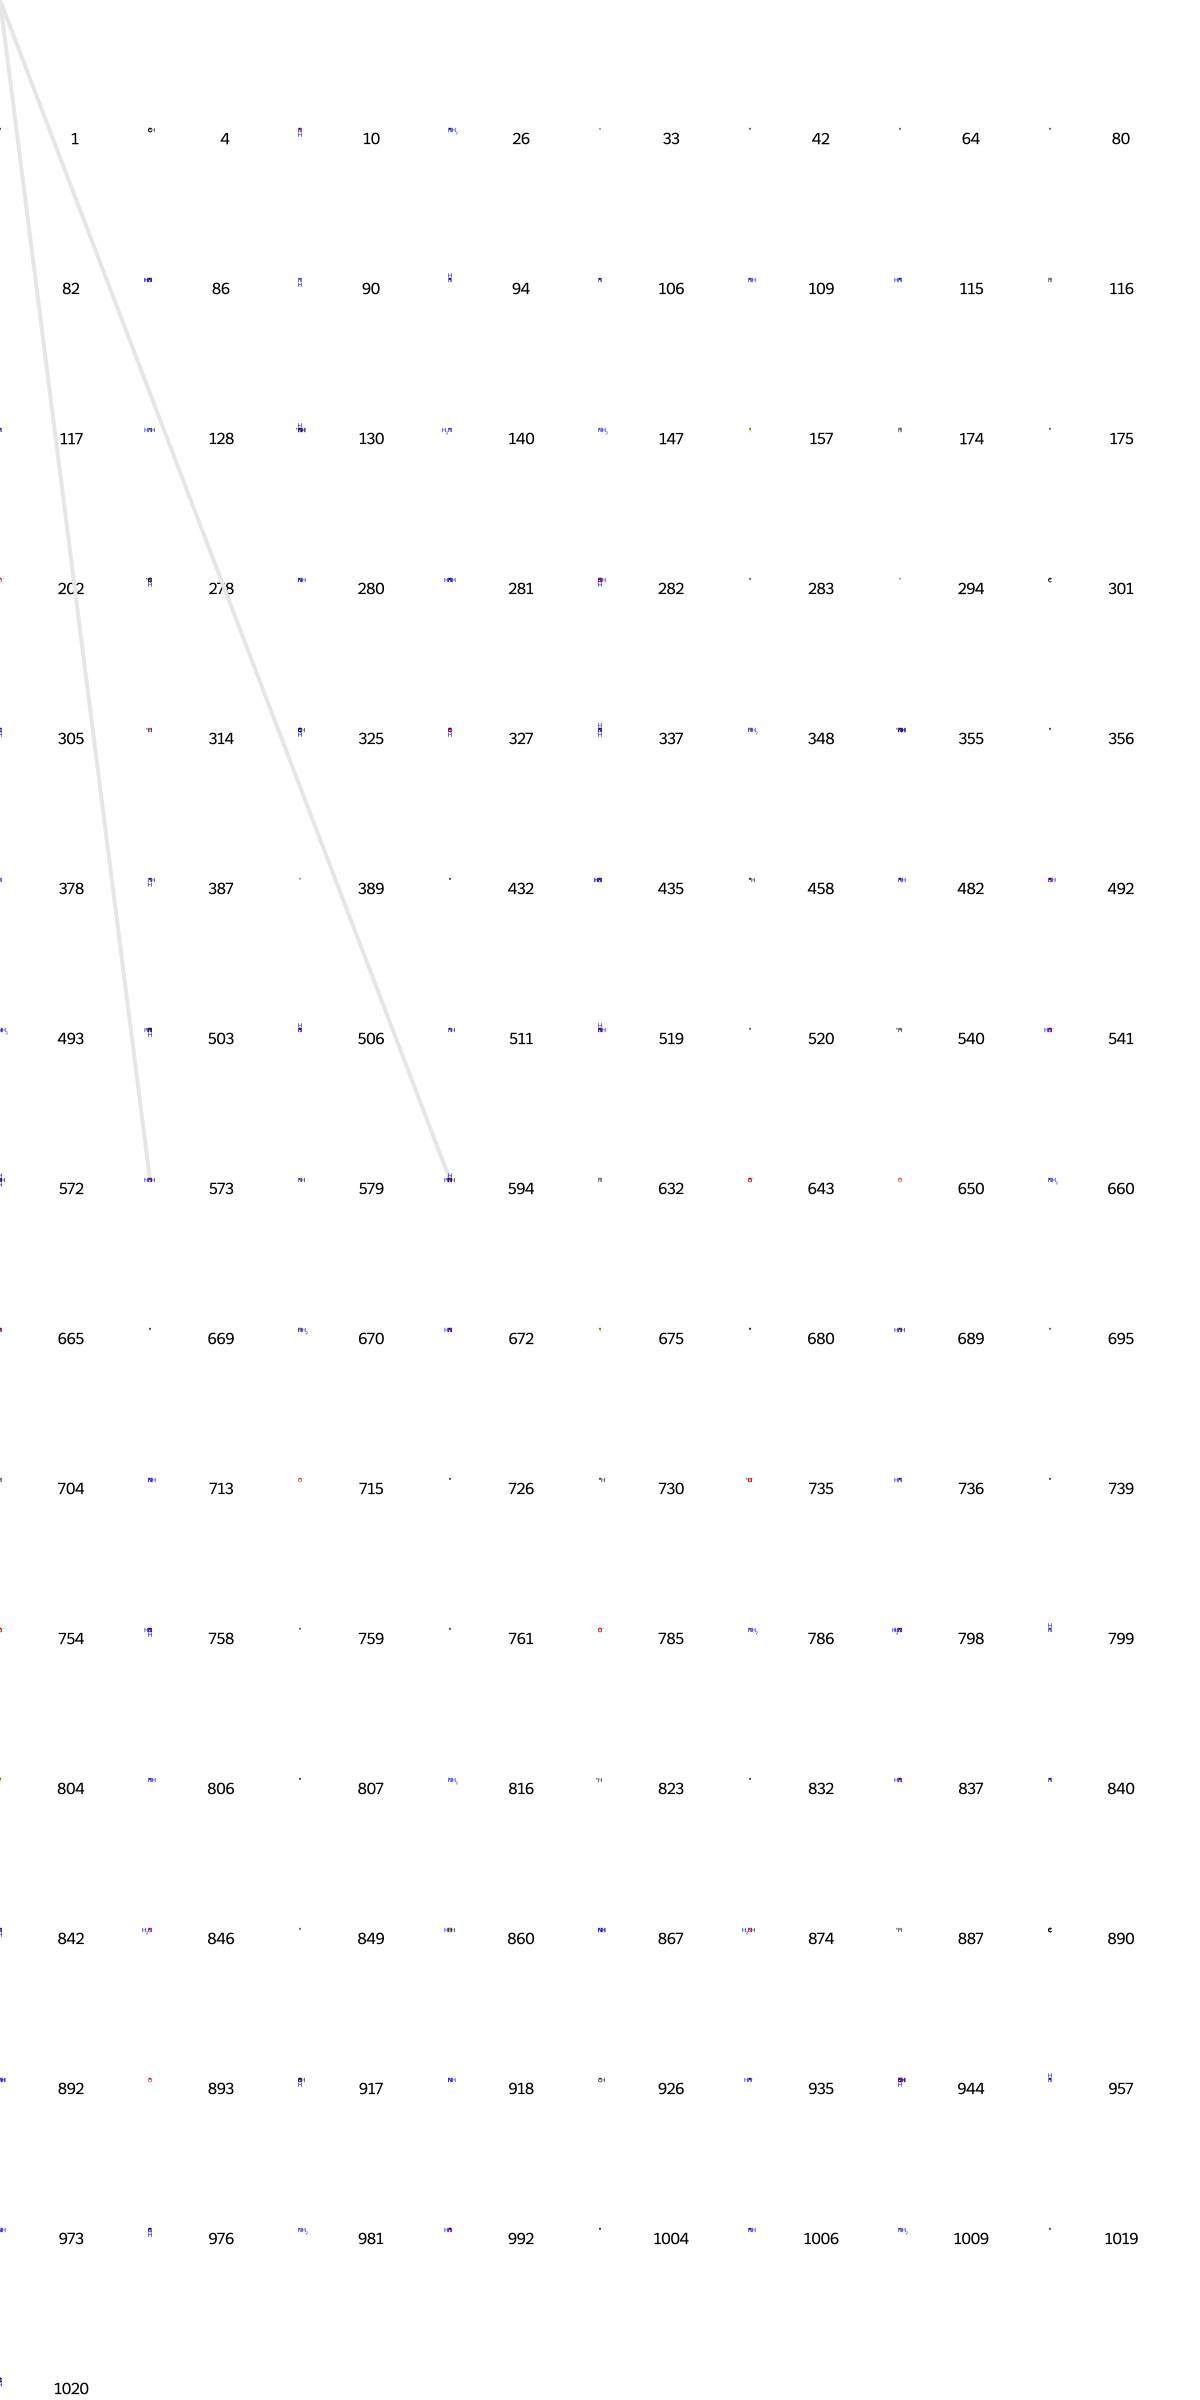

In [5183]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [5184]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 4,
 14,
 21,
 33,
 66,
 80,
 102,
 118,
 126,
 128,
 169,
 195,
 219,
 227,
 283,
 310,
 322,
 356,
 362,
 421,
 428,
 430,
 514,
 540,
 550,
 606,
 650,
 658,
 695,
 718,
 726,
 730,
 782,
 807,
 841,
 849,
 893,
 1006,
 1014]

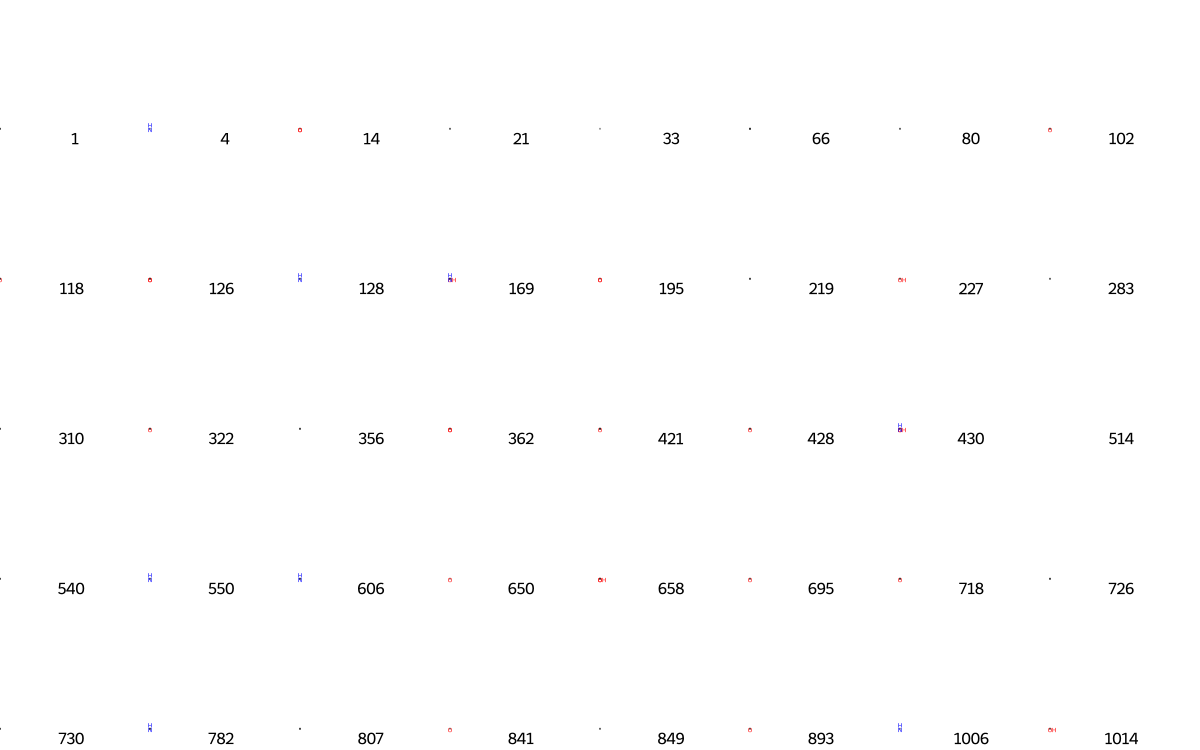

In [5185]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [5186]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 69,
 77,
 80,
 89,
 90,
 114,
 118,
 119,
 125,
 128,
 145,
 175,
 186,
 216,
 275,
 315,
 329,
 333,
 356,
 361,
 386,
 389,
 392,
 428,
 496,
 503,
 554,
 603,
 606,
 625,
 650,
 656,
 695,
 698,
 721,
 726,
 759,
 807,
 821,
 843,
 849,
 875,
 882,
 893,
 946,
 961,
 1023]

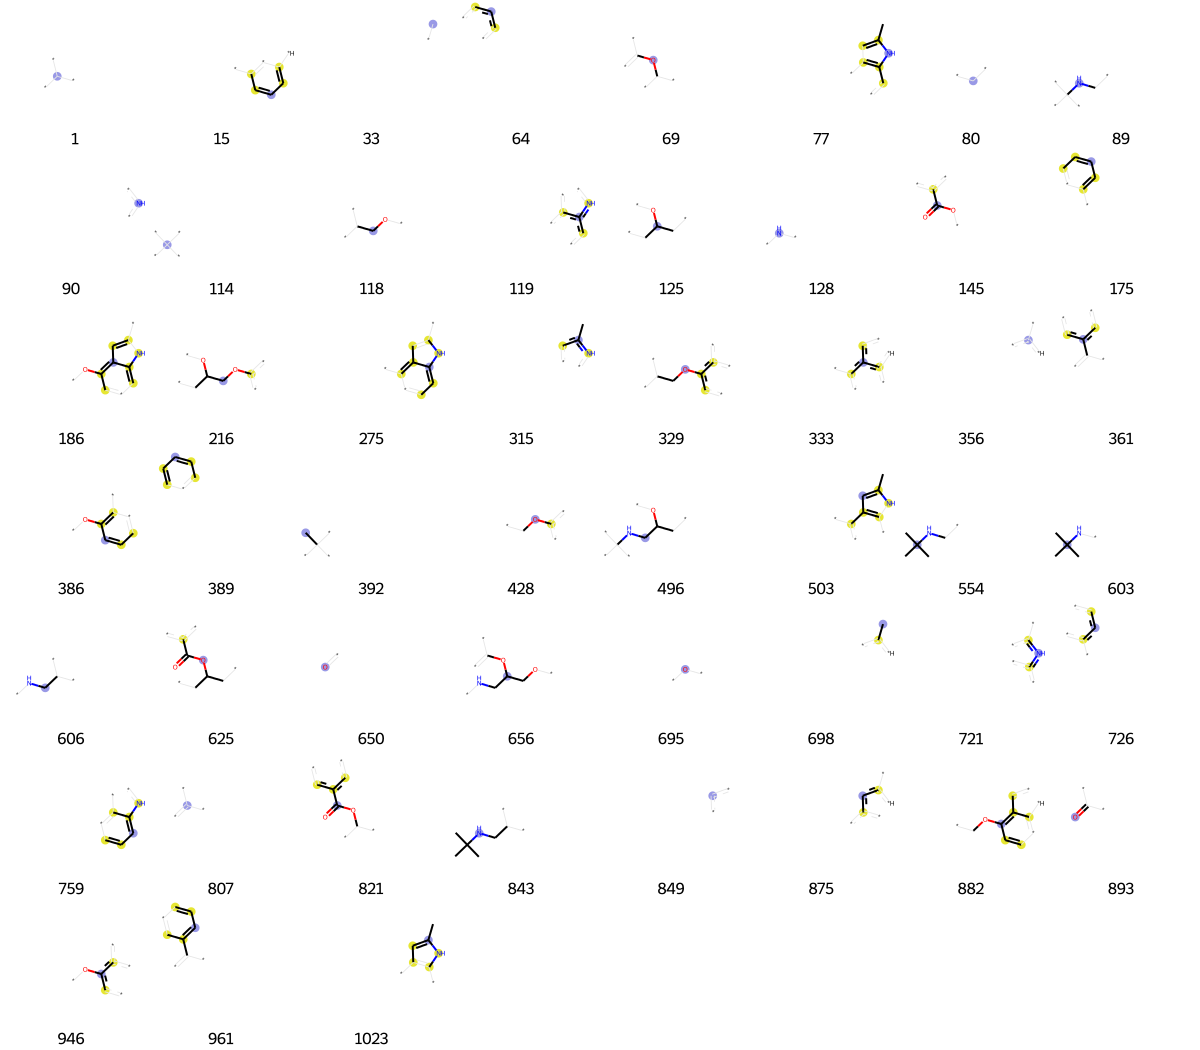

In [5187]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [5188]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 33,
 46,
 77,
 102,
 114,
 216,
 232,
 270,
 322,
 343,
 356,
 373,
 378,
 392,
 493,
 540,
 561,
 579,
 630,
 649,
 650,
 659,
 664,
 695,
 718,
 726,
 792,
 799,
 807,
 816,
 842,
 843,
 849,
 871,
 893,
 932,
 935,
 968]

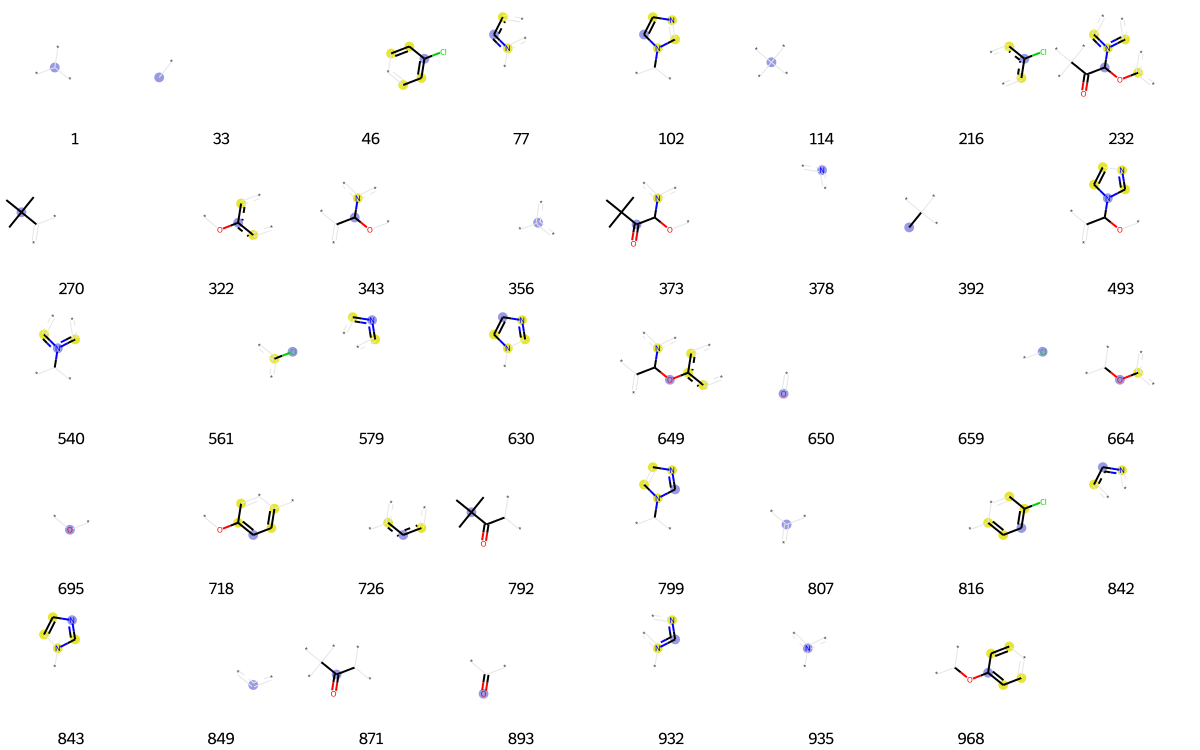

In [5189]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [5190]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 36,
 55,
 74,
 90,
 96,
 114,
 119,
 128,
 189,
 200,
 208,
 231,
 236,
 248,
 253,
 255,
 272,
 314,
 356,
 378,
 383,
 393,
 420,
 429,
 440,
 476,
 486,
 511,
 551,
 582,
 599,
 600,
 609,
 627,
 641,
 650,
 654,
 663,
 666,
 698,
 699,
 726,
 779,
 792,
 807,
 809,
 816,
 831,
 849,
 875,
 891,
 893,
 904,
 924,
 926,
 947,
 1019]

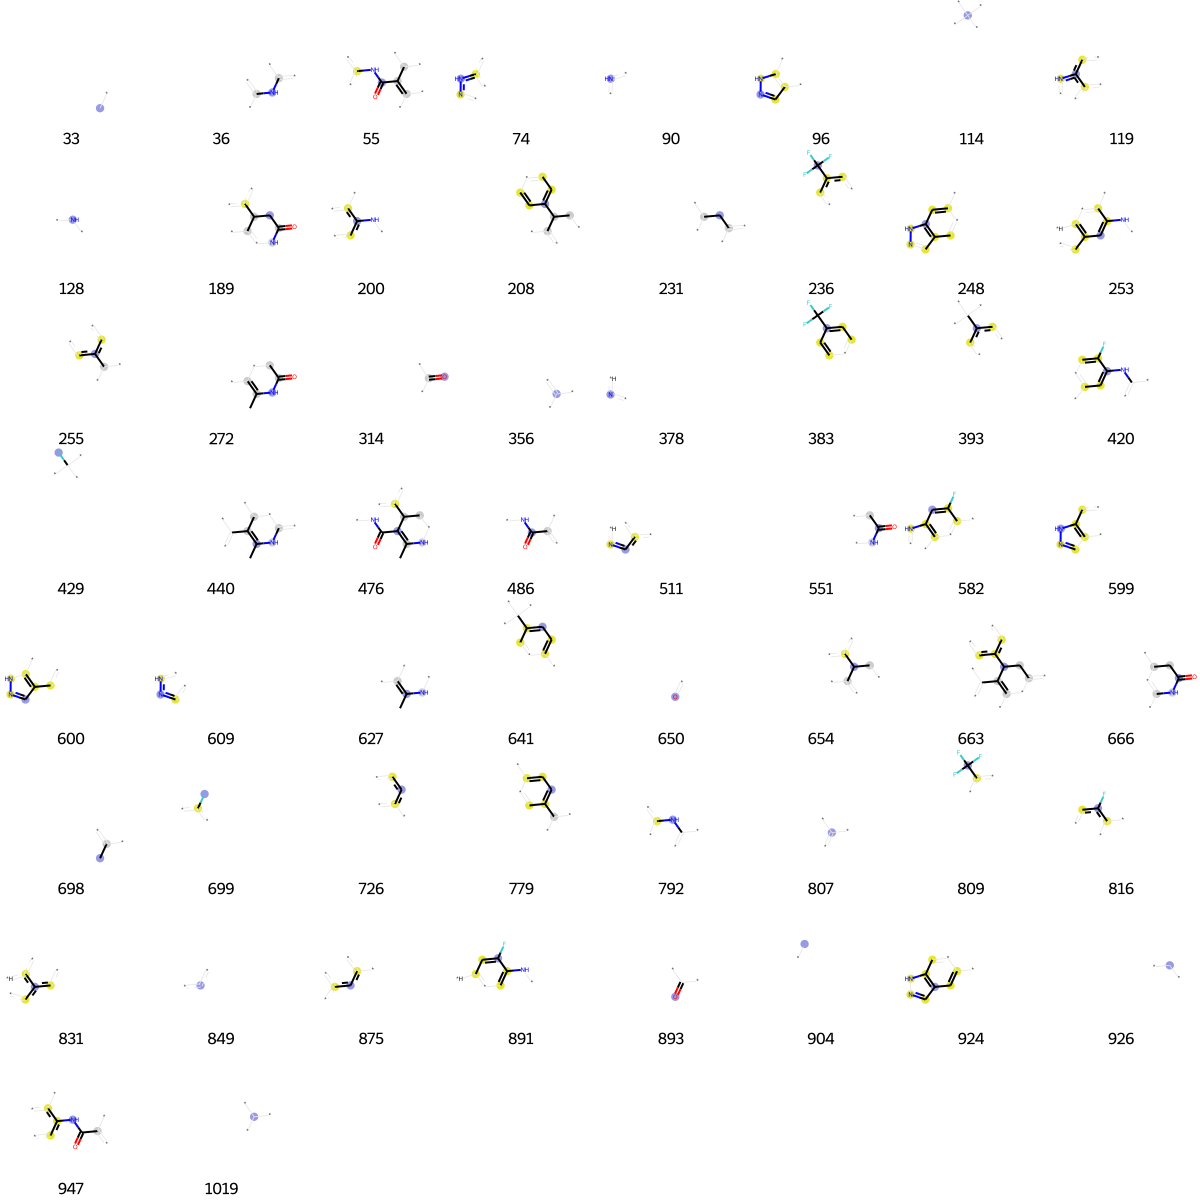

In [5191]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [5192]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[1,
 26,
 80,
 147,
 300,
 389,
 403,
 605,
 650,
 680,
 776,
 786,
 801,
 807,
 820,
 825,
 893,
 904,
 932]

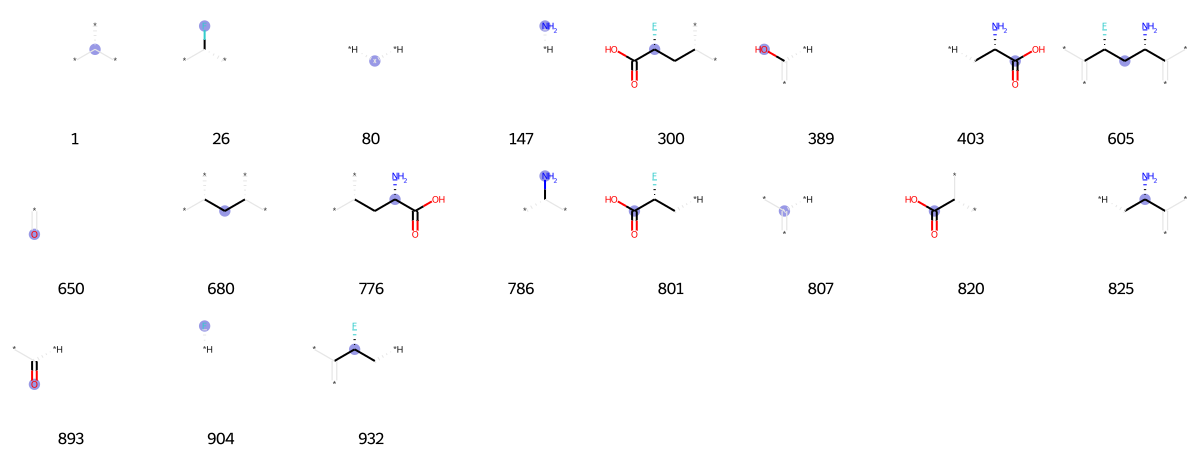

In [5193]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [5194]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 64,
 80,
 86,
 90,
 106,
 119,
 133,
 136,
 175,
 231,
 232,
 235,
 255,
 263,
 275,
 288,
 301,
 314,
 320,
 333,
 338,
 353,
 356,
 378,
 389,
 415,
 440,
 540,
 607,
 620,
 624,
 625,
 650,
 698,
 713,
 721,
 723,
 726,
 728,
 736,
 743,
 750,
 768,
 779,
 799,
 807,
 827,
 830,
 849,
 875,
 885,
 893,
 909,
 915,
 926,
 929,
 935,
 991,
 1009,
 1013,
 1019]

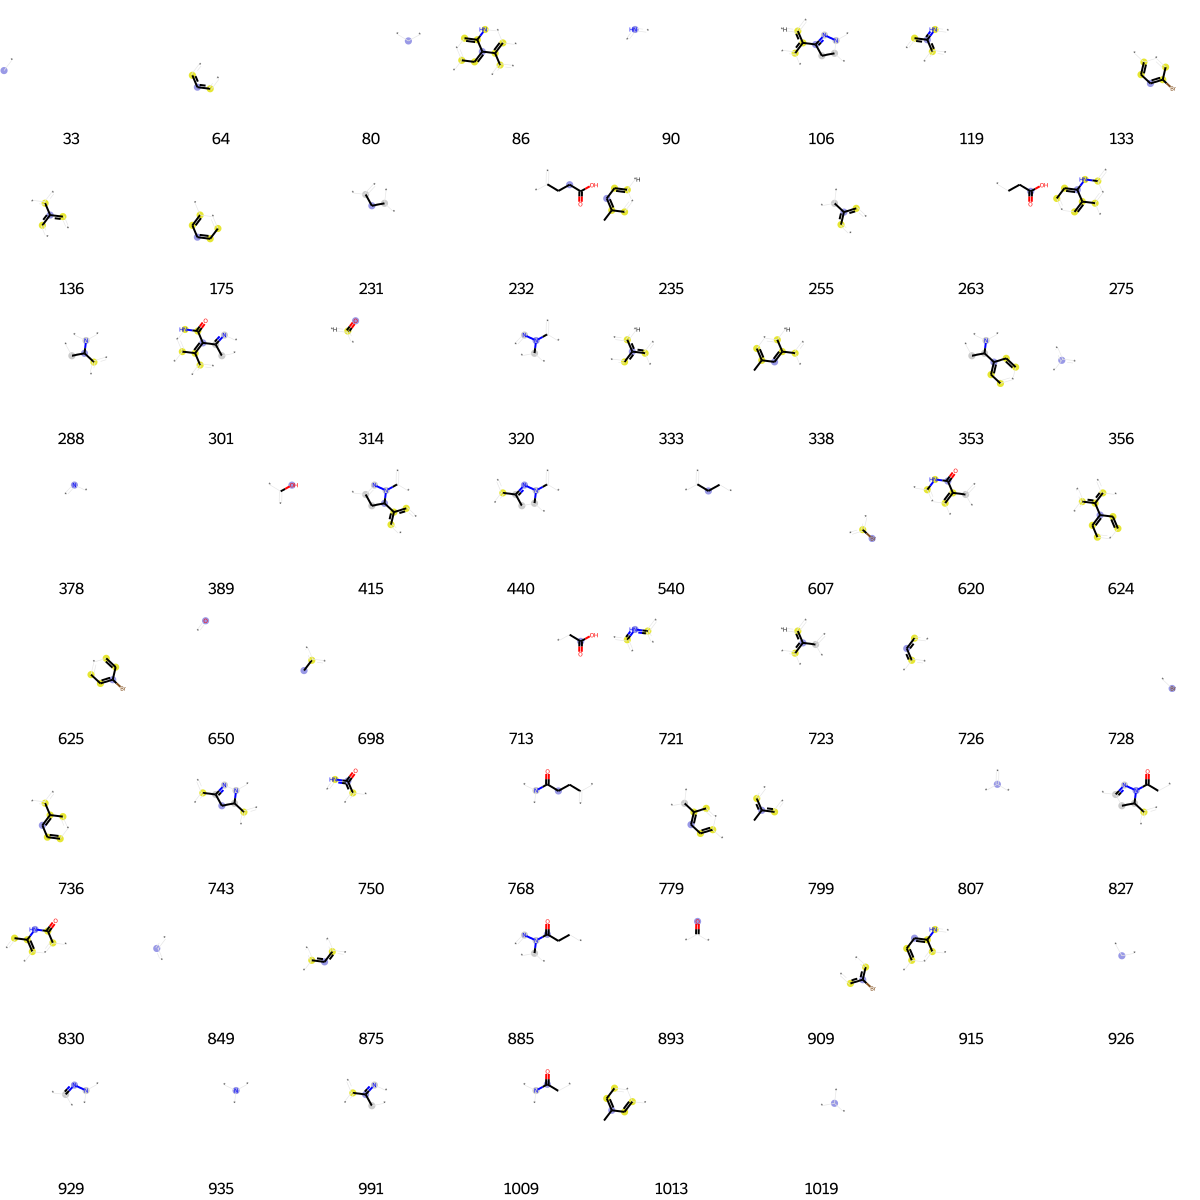

In [5195]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [5196]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 23,
 33,
 40,
 64,
 74,
 80,
 175,
 214,
 217,
 283,
 294,
 316,
 341,
 353,
 356,
 361,
 386,
 389,
 456,
 465,
 557,
 650,
 687,
 690,
 695,
 726,
 732,
 736,
 737,
 758,
 767,
 807,
 849,
 887,
 893,
 898,
 926,
 935,
 961]

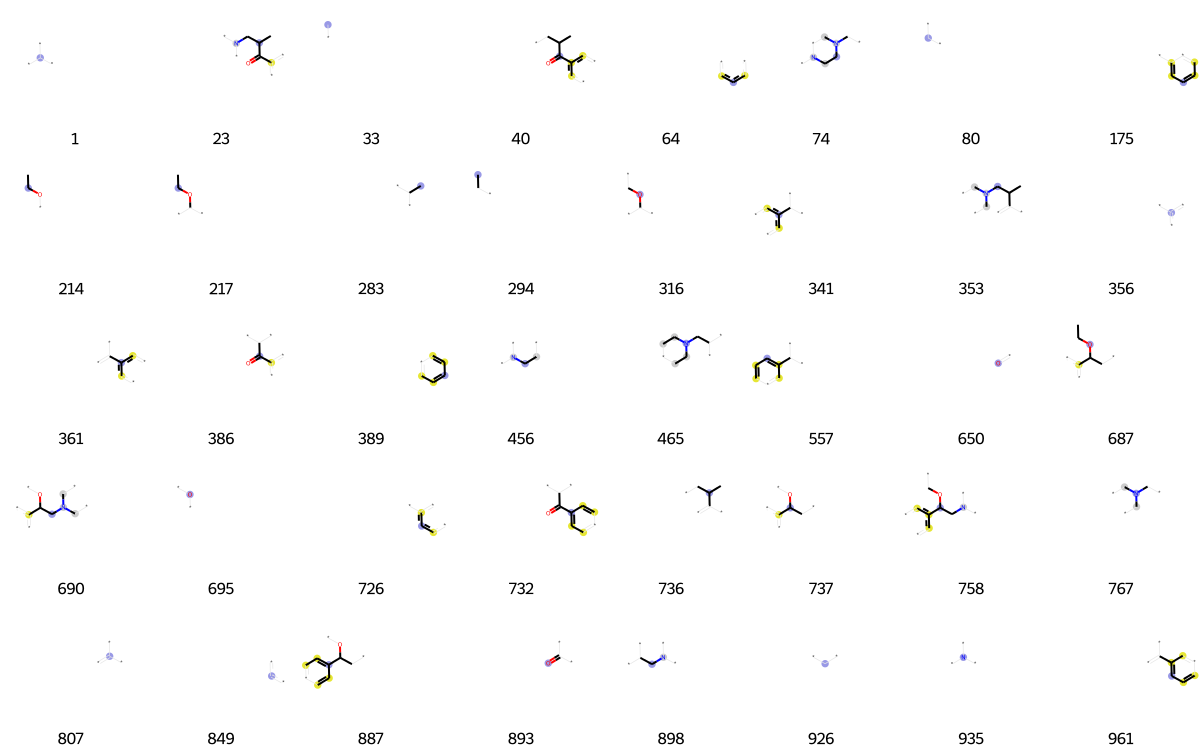

In [5197]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [5198]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 36,
 60,
 130,
 233,
 250,
 268,
 333,
 345,
 375,
 478,
 528,
 549,
 612,
 728,
 760,
 807,
 904,
 926,
 1019]

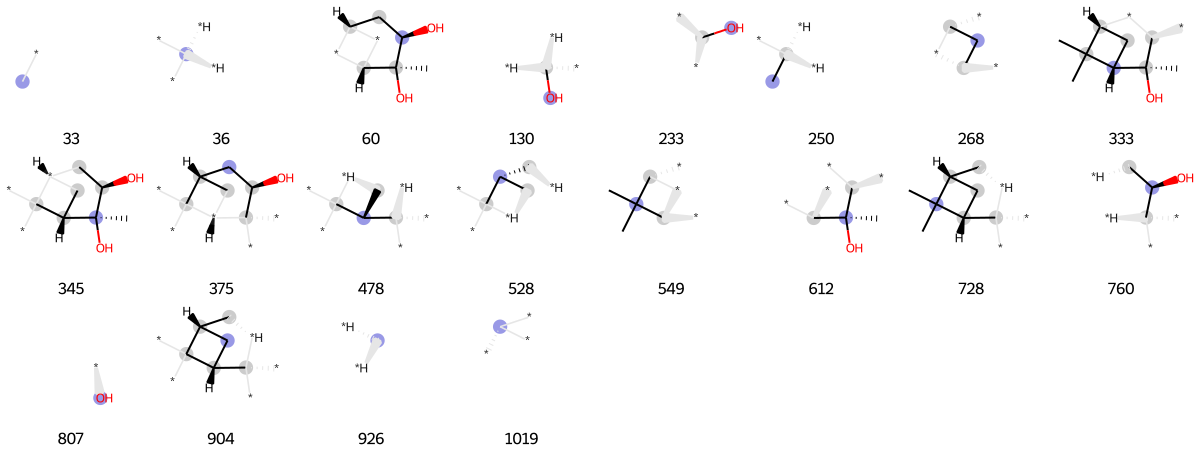

In [5199]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [5200]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[23,
 33,
 34,
 61,
 80,
 90,
 146,
 285,
 294,
 296,
 305,
 308,
 314,
 333,
 339,
 356,
 389,
 407,
 416,
 421,
 429,
 431,
 444,
 453,
 456,
 464,
 483,
 513,
 514,
 525,
 578,
 650,
 699,
 705,
 739,
 750,
 804,
 807,
 816,
 825,
 844,
 849,
 850,
 875,
 893,
 904,
 926,
 935,
 967,
 1019]

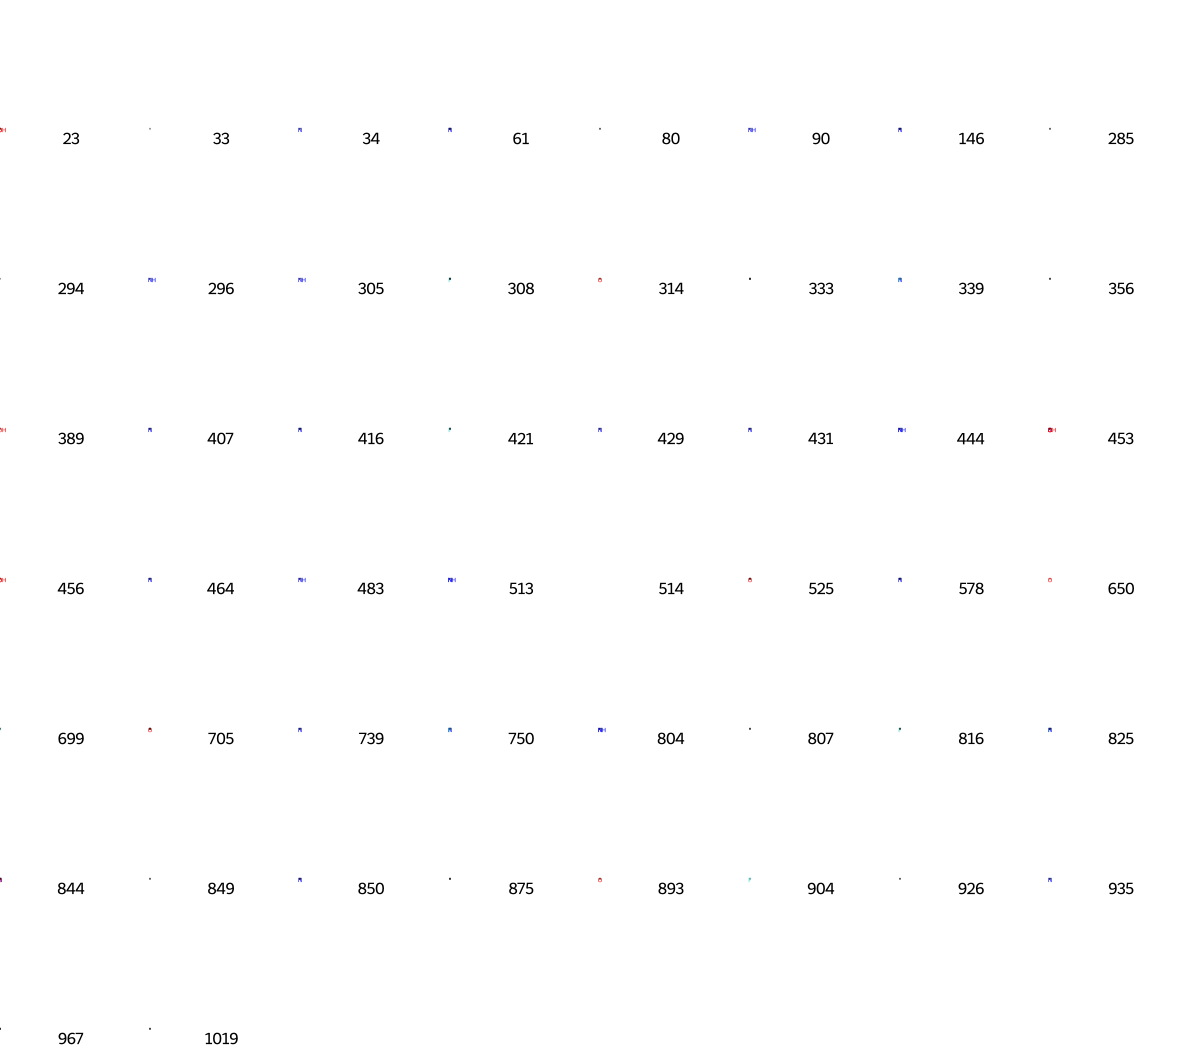

In [5201]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [5202]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[3,
 20,
 33,
 64,
 74,
 80,
 90,
 115,
 121,
 144,
 175,
 233,
 249,
 259,
 301,
 313,
 314,
 352,
 356,
 367,
 371,
 407,
 446,
 456,
 458,
 484,
 496,
 503,
 633,
 650,
 667,
 678,
 687,
 698,
 726,
 748,
 767,
 801,
 832,
 849,
 875,
 926,
 935,
 942,
 984,
 1019]

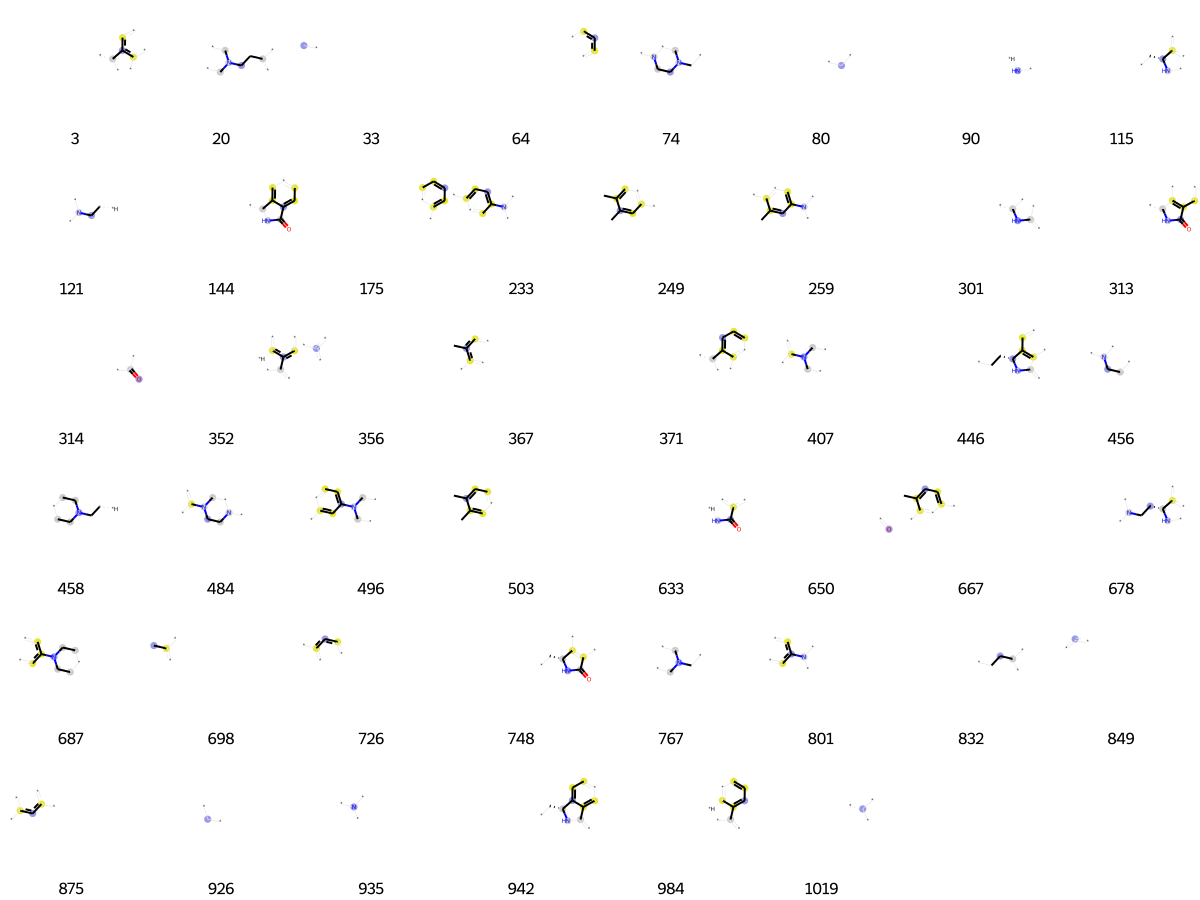

In [5203]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [5204]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[13,
 33,
 36,
 66,
 71,
 90,
 105,
 109,
 114,
 120,
 128,
 138,
 159,
 164,
 206,
 250,
 264,
 279,
 301,
 314,
 335,
 354,
 356,
 392,
 432,
 453,
 463,
 509,
 519,
 522,
 529,
 547,
 562,
 575,
 593,
 603,
 622,
 627,
 650,
 658,
 689,
 732,
 787,
 807,
 849,
 893,
 926,
 927,
 1019]

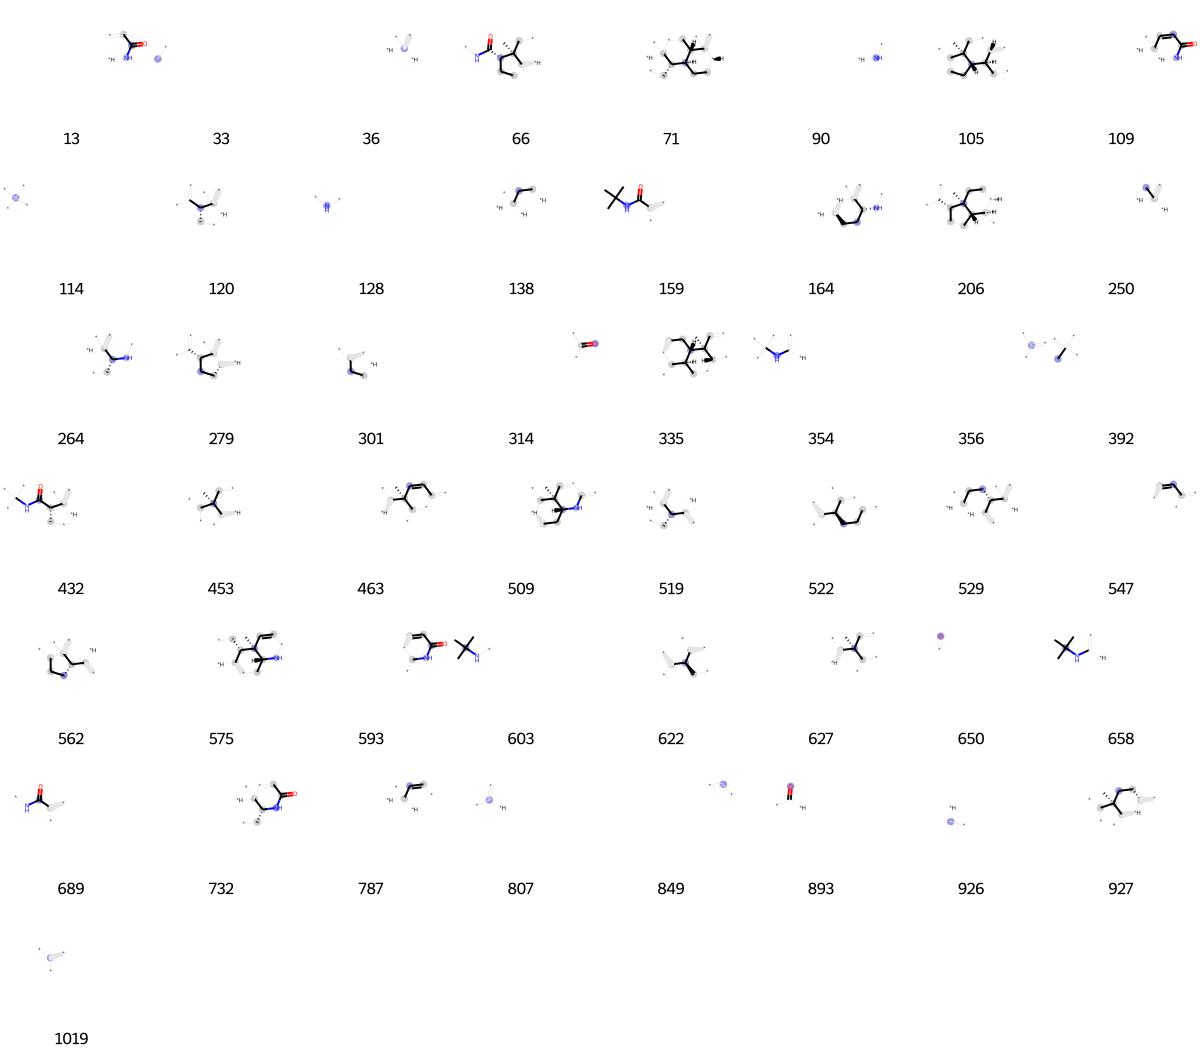

In [5205]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [5206]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33,
 73,
 90,
 119,
 136,
 180,
 231,
 260,
 285,
 314,
 322,
 356,
 378,
 426,
 430,
 454,
 470,
 479,
 512,
 516,
 535,
 551,
 585,
 650,
 674,
 695,
 710,
 718,
 721,
 726,
 728,
 774,
 781,
 788,
 831,
 841,
 849,
 875,
 887,
 896,
 903,
 915,
 926,
 928,
 1009,
 1019]

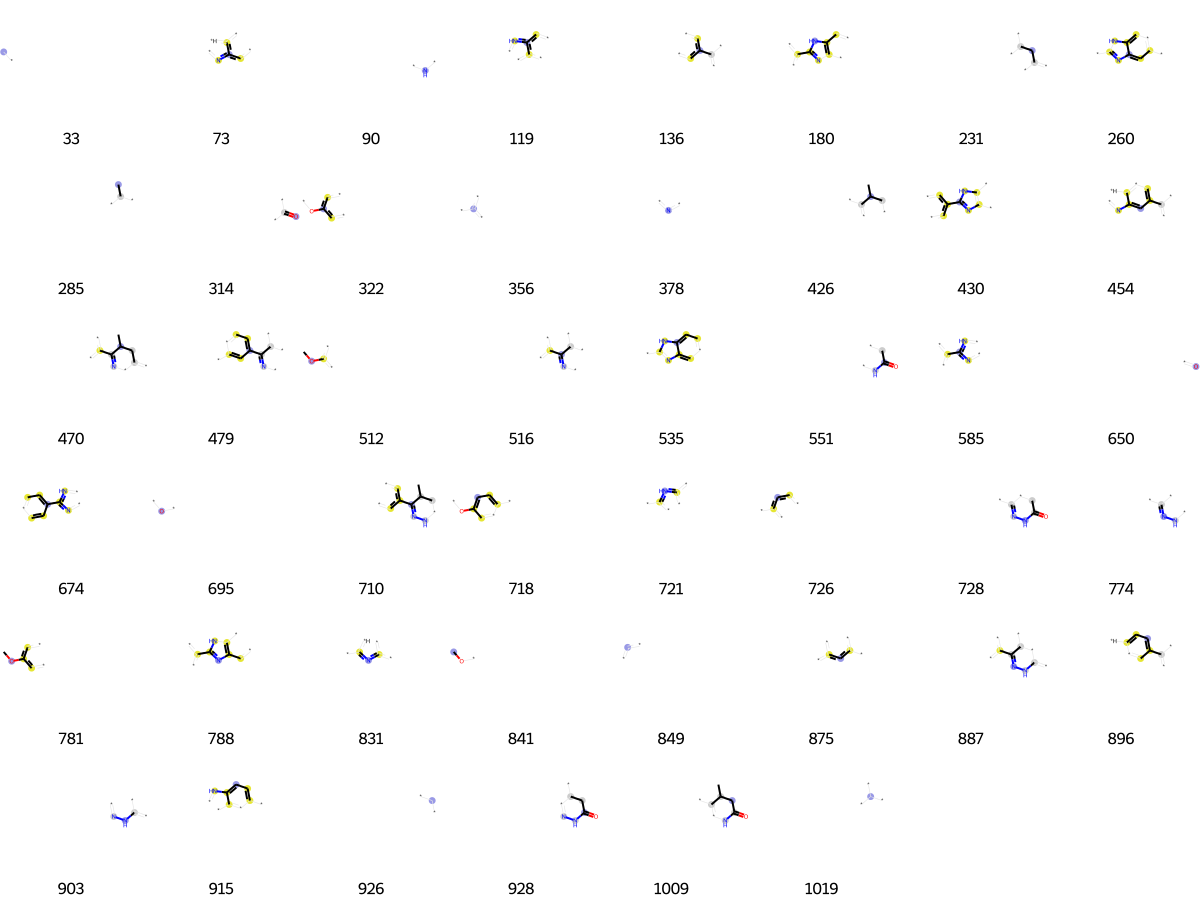

In [5207]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [5208]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[13,
 22,
 25,
 33,
 36,
 50,
 53,
 80,
 101,
 114,
 138,
 175,
 210,
 222,
 233,
 249,
 250,
 265,
 267,
 268,
 282,
 284,
 299,
 301,
 357,
 392,
 401,
 411,
 412,
 453,
 463,
 478,
 479,
 489,
 492,
 549,
 550,
 555,
 558,
 576,
 608,
 610,
 612,
 656,
 666,
 669,
 694,
 695,
 729,
 740,
 807,
 820,
 849,
 865,
 869,
 871,
 880,
 889,
 897,
 904,
 921,
 926,
 927,
 939,
 953,
 991,
 1009,
 1017,
 1019]

In [5209]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 26,
 33,
 47,
 102,
 119,
 121,
 145,
 211,
 216,
 268,
 278,
 301,
 303,
 338,
 352,
 356,
 361,
 561,
 650,
 659,
 695,
 723,
 807,
 834,
 838,
 849,
 875,
 886,
 892,
 893,
 926,
 935,
 1019]

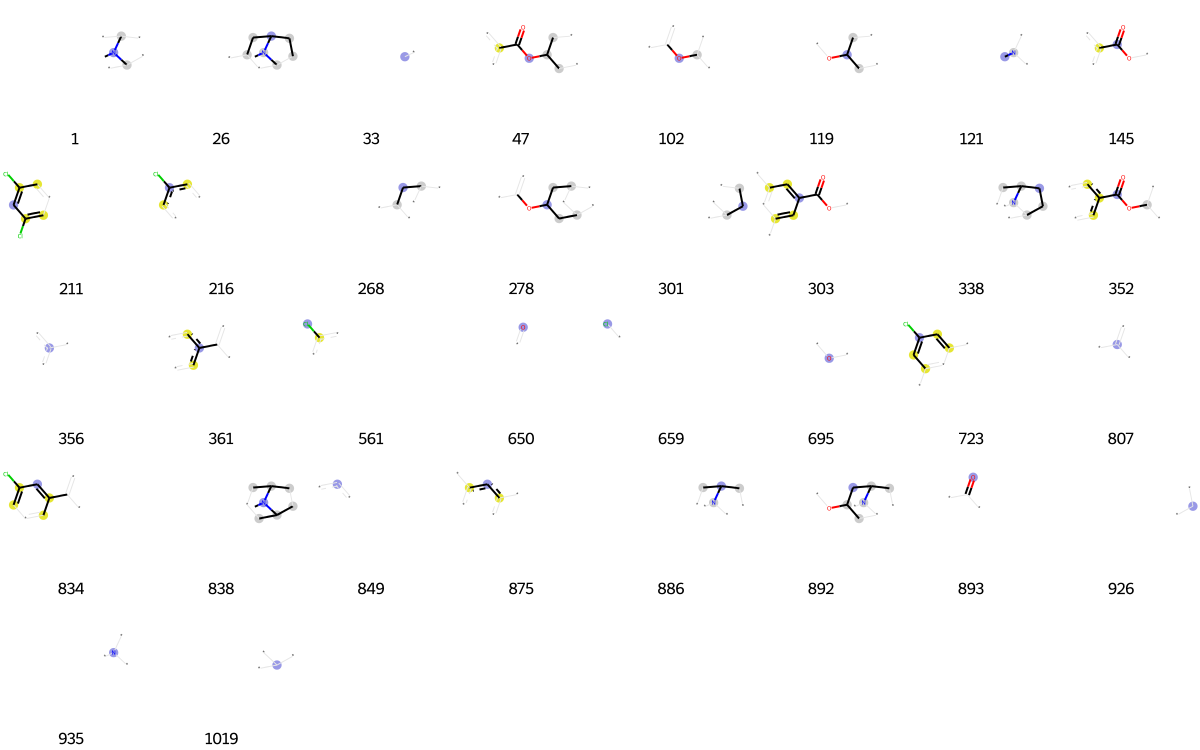

In [5210]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [5211]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 108,
 147,
 289,
 341,
 356,
 389,
 578,
 607,
 650,
 709,
 726,
 745,
 754,
 786,
 807,
 820,
 829,
 849,
 893,
 1022]

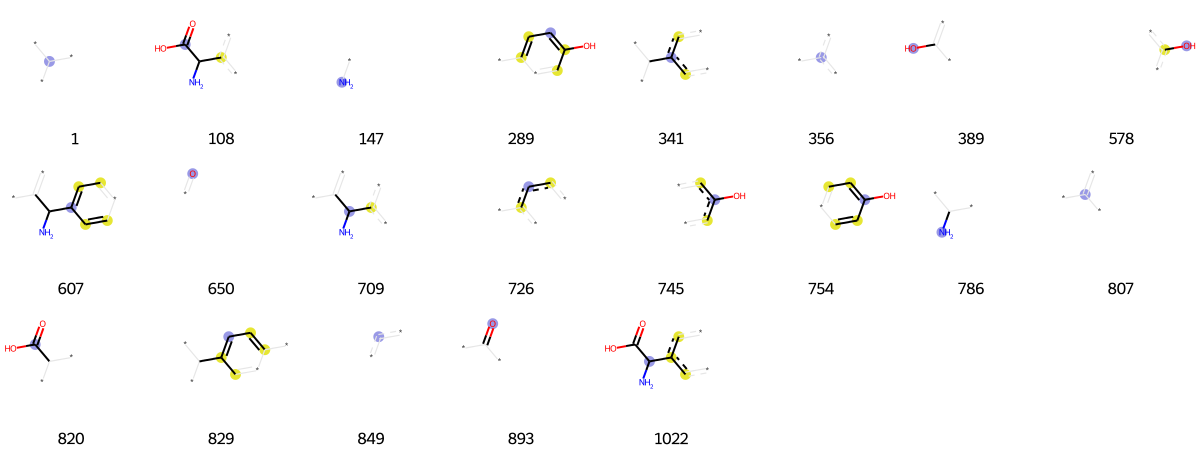

In [5212]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [5213]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[19,
 25,
 33,
 38,
 64,
 75,
 80,
 87,
 90,
 114,
 128,
 197,
 204,
 213,
 223,
 294,
 295,
 311,
 320,
 333,
 352,
 356,
 361,
 369,
 378,
 380,
 392,
 428,
 429,
 439,
 448,
 549,
 562,
 572,
 587,
 650,
 669,
 701,
 726,
 741,
 787,
 806,
 807,
 817,
 830,
 831,
 842,
 849,
 855,
 856,
 893,
 904,
 922,
 1009]

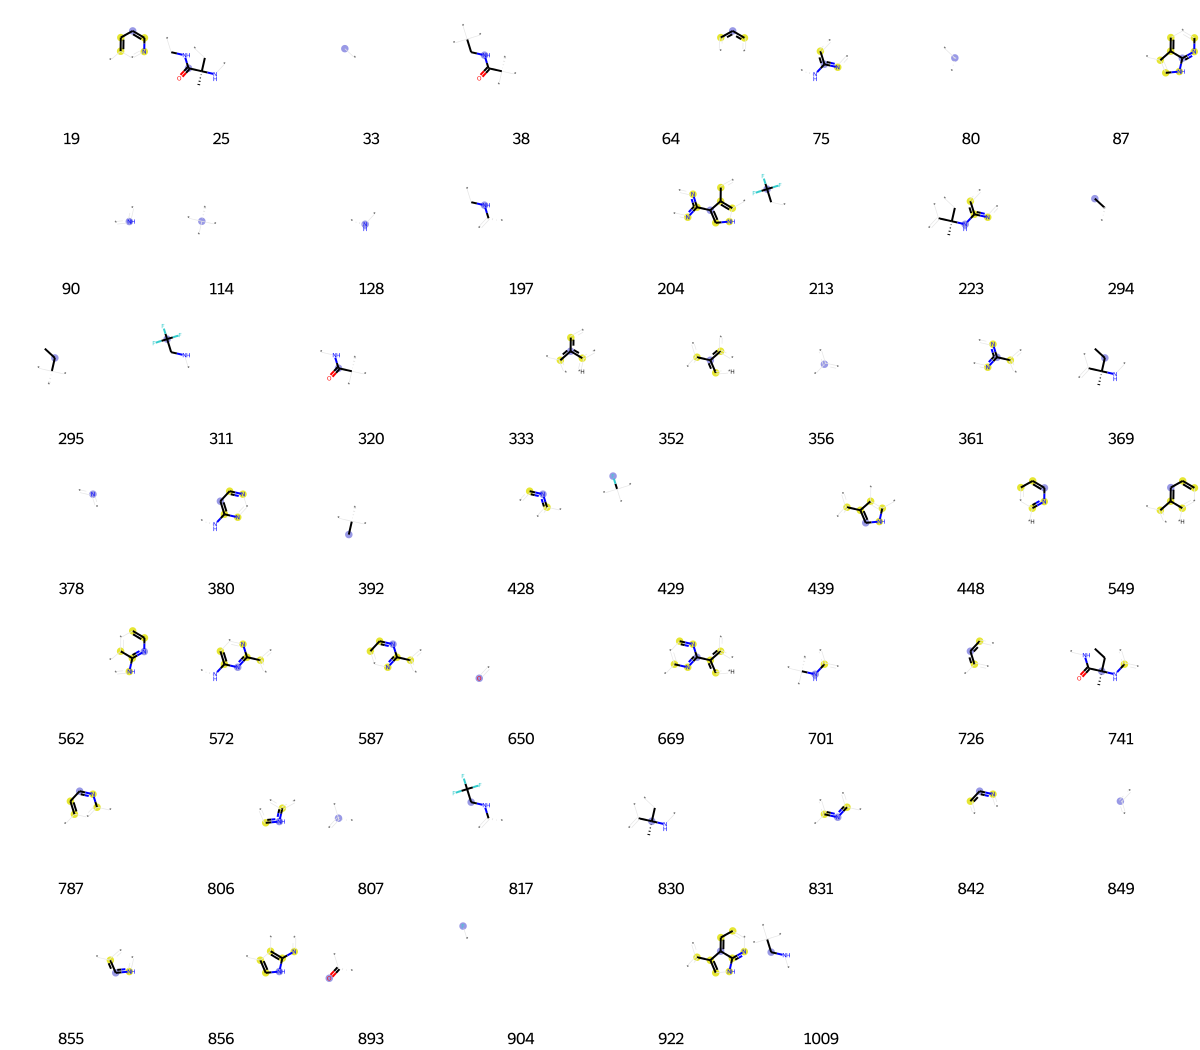

In [5214]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [5215]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 33,
 64,
 80,
 84,
 90,
 102,
 124,
 128,
 175,
 221,
 249,
 255,
 301,
 305,
 325,
 347,
 356,
 379,
 386,
 389,
 483,
 512,
 522,
 545,
 573,
 637,
 639,
 659,
 695,
 726,
 742,
 841,
 849,
 869,
 888,
 926,
 946,
 1012,
 1019]

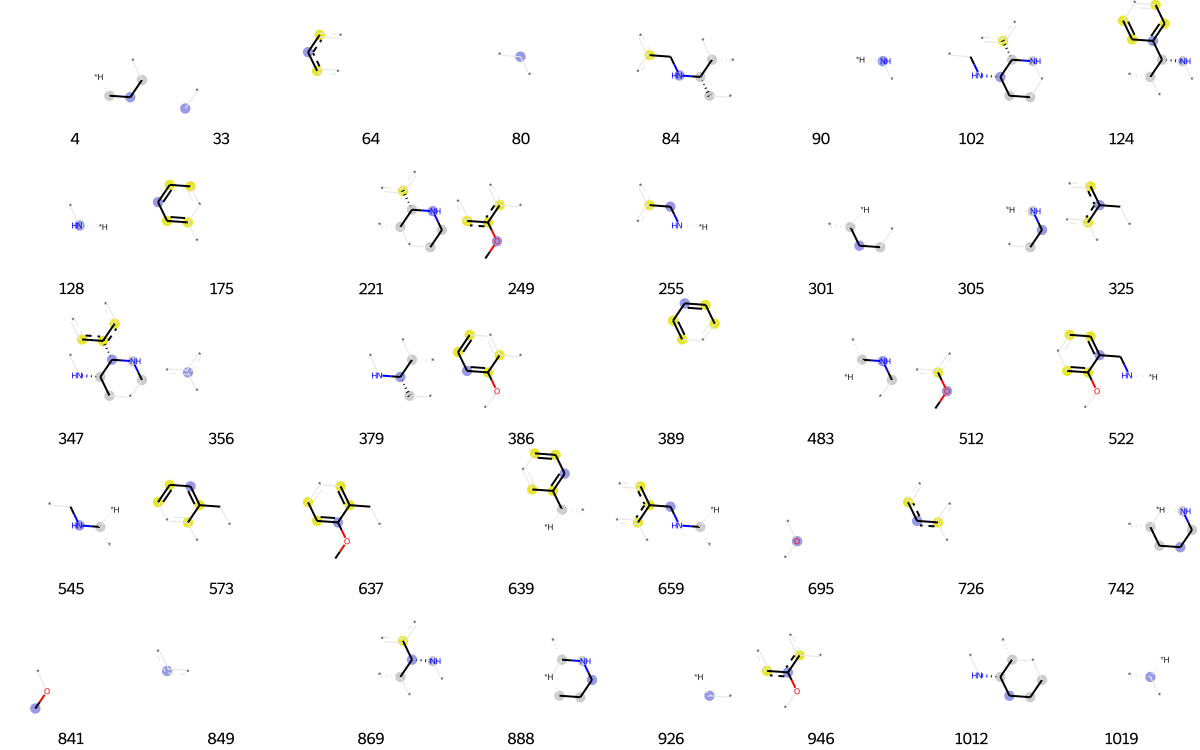

In [5216]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [5217]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[64,
 73,
 89,
 90,
 118,
 168,
 175,
 211,
 289,
 305,
 313,
 329,
 356,
 377,
 378,
 388,
 412,
 428,
 511,
 518,
 641,
 726,
 773,
 831,
 836,
 842,
 849,
 881,
 926,
 980]

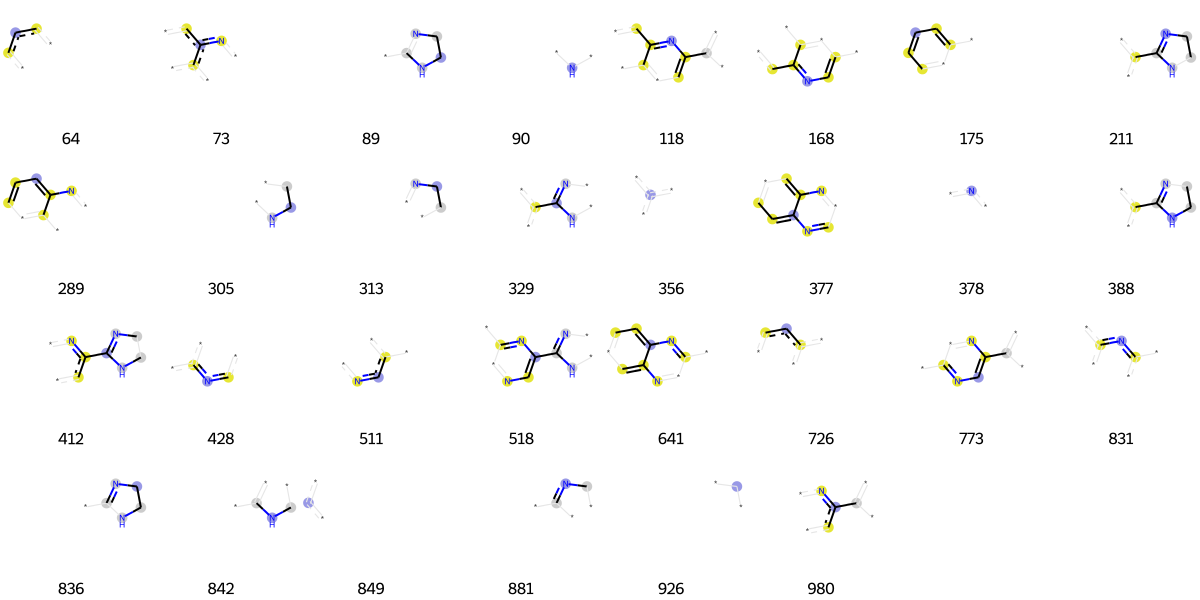

In [5218]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [5219]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[4,
 8,
 58,
 59,
 64,
 123,
 128,
 175,
 187,
 200,
 246,
 283,
 301,
 350,
 351,
 356,
 362,
 366,
 392,
 446,
 451,
 452,
 456,
 480,
 500,
 502,
 503,
 558,
 561,
 565,
 650,
 659,
 672,
 699,
 712,
 714,
 726,
 739,
 766,
 770,
 807,
 816,
 830,
 849,
 875,
 886,
 893,
 894,
 904,
 926,
 935,
 967,
 969,
 985,
 1019]

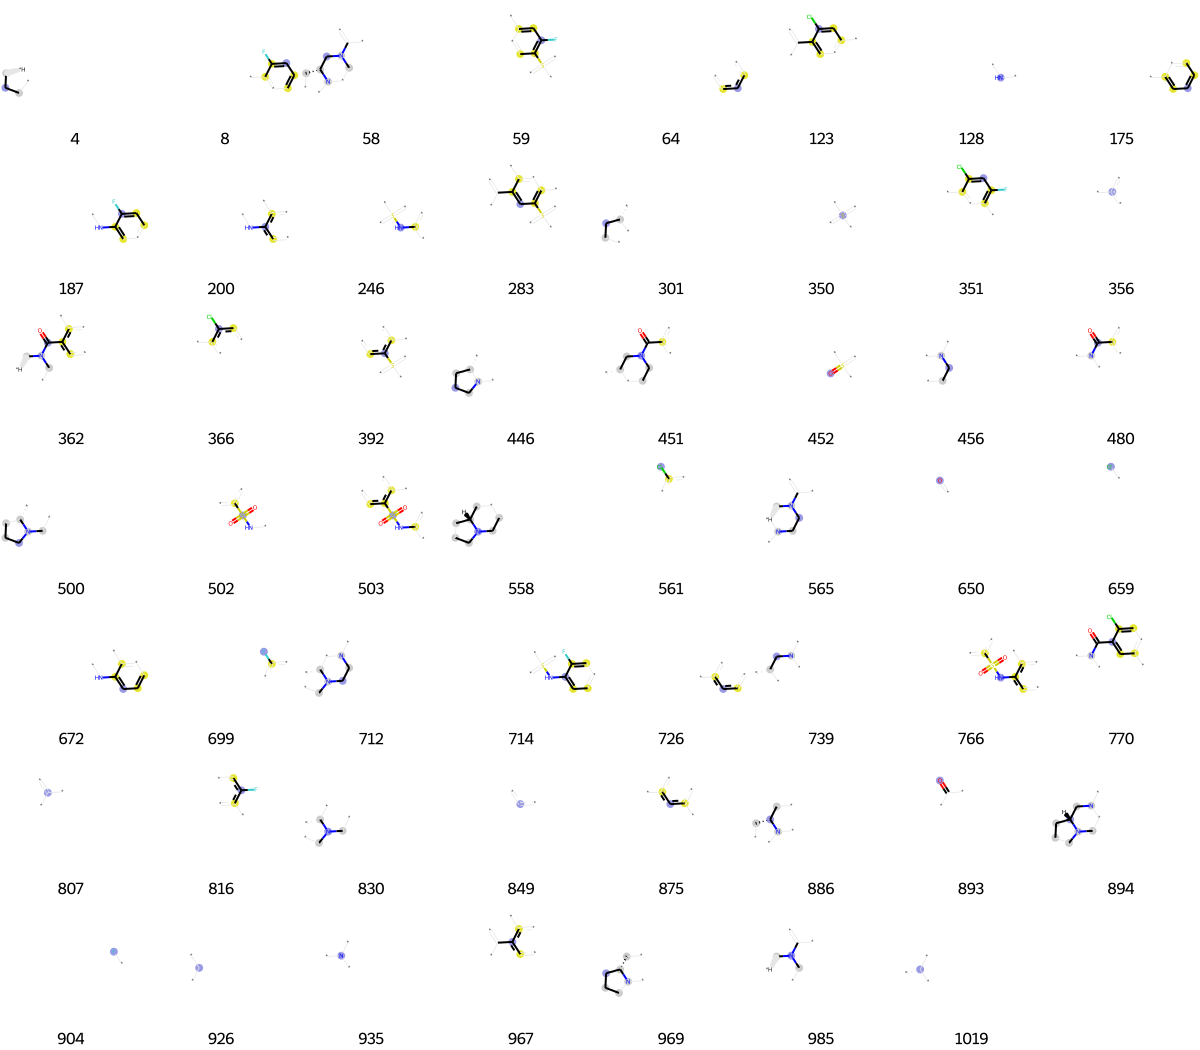

In [5220]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [5221]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[0,
 33,
 41,
 64,
 80,
 90,
 123,
 155,
 175,
 197,
 201,
 214,
 219,
 227,
 249,
 251,
 273,
 284,
 294,
 301,
 305,
 310,
 325,
 332,
 356,
 361,
 371,
 386,
 404,
 470,
 507,
 512,
 573,
 580,
 587,
 637,
 649,
 650,
 673,
 695,
 726,
 730,
 807,
 809,
 841,
 849,
 880,
 881,
 893,
 926,
 927,
 932,
 946,
 957,
 1019]

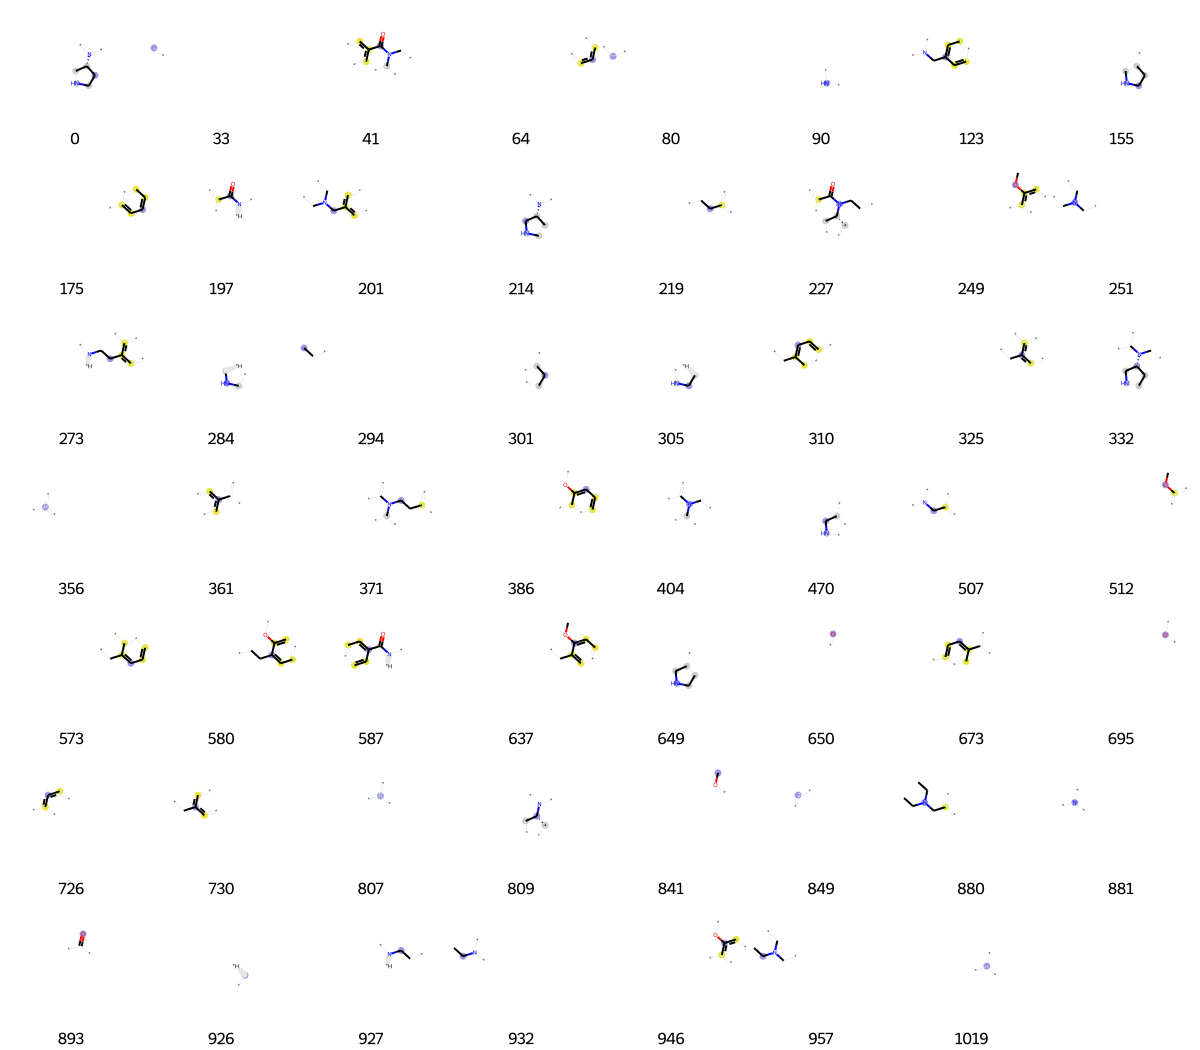

In [5222]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [5223]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[10,
 13,
 21,
 33,
 48,
 80,
 102,
 121,
 143,
 147,
 219,
 273,
 294,
 310,
 314,
 322,
 356,
 401,
 409,
 428,
 445,
 458,
 588,
 591,
 648,
 650,
 667,
 675,
 694,
 695,
 718,
 726,
 730,
 755,
 770,
 794,
 816,
 849,
 879,
 887,
 935,
 947,
 959,
 981,
 1003,
 1020]

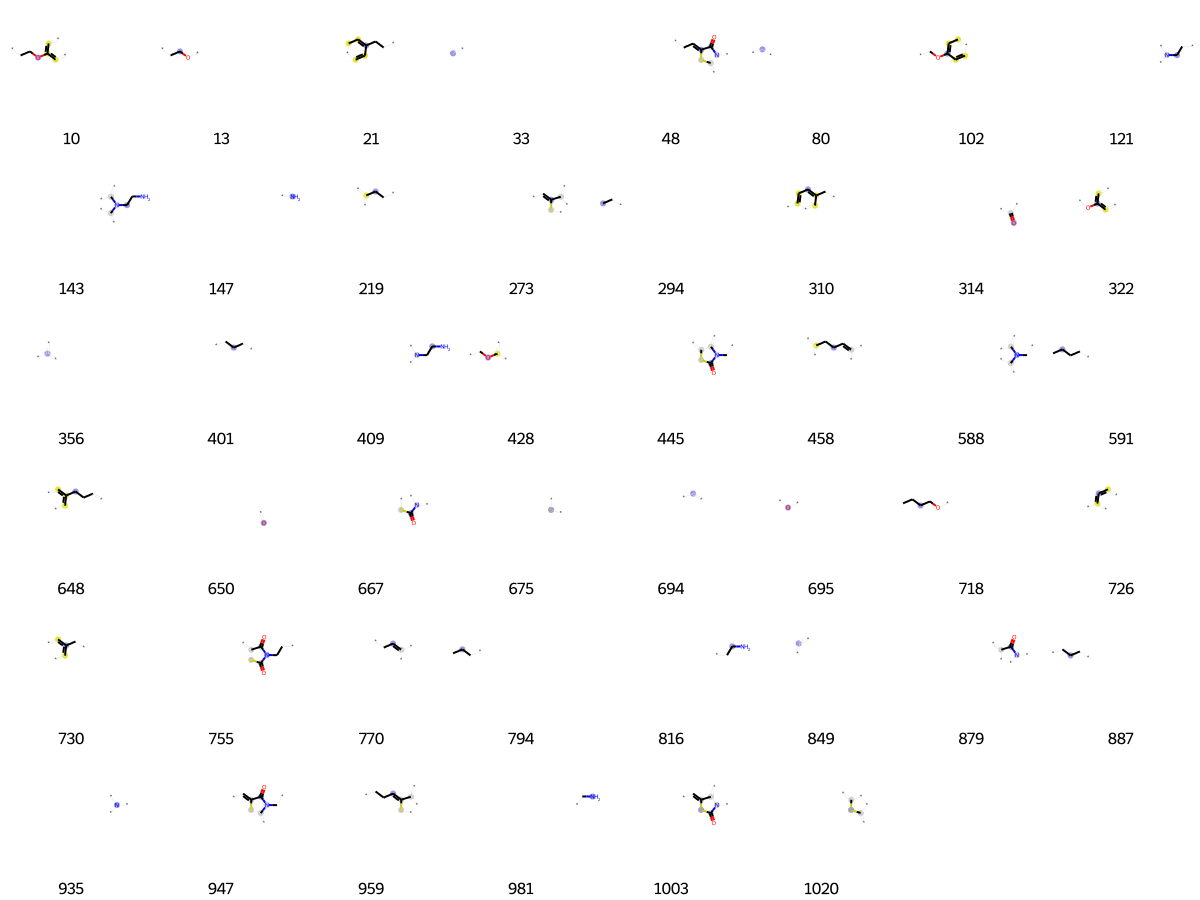

In [5224]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [5225]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[3,
 4,
 15,
 33,
 36,
 64,
 73,
 90,
 102,
 110,
 138,
 140,
 147,
 149,
 170,
 250,
 289,
 305,
 306,
 309,
 356,
 378,
 394,
 423,
 458,
 464,
 506,
 591,
 650,
 697,
 721,
 726,
 763,
 766,
 807,
 831,
 849,
 893,
 924,
 926,
 967]

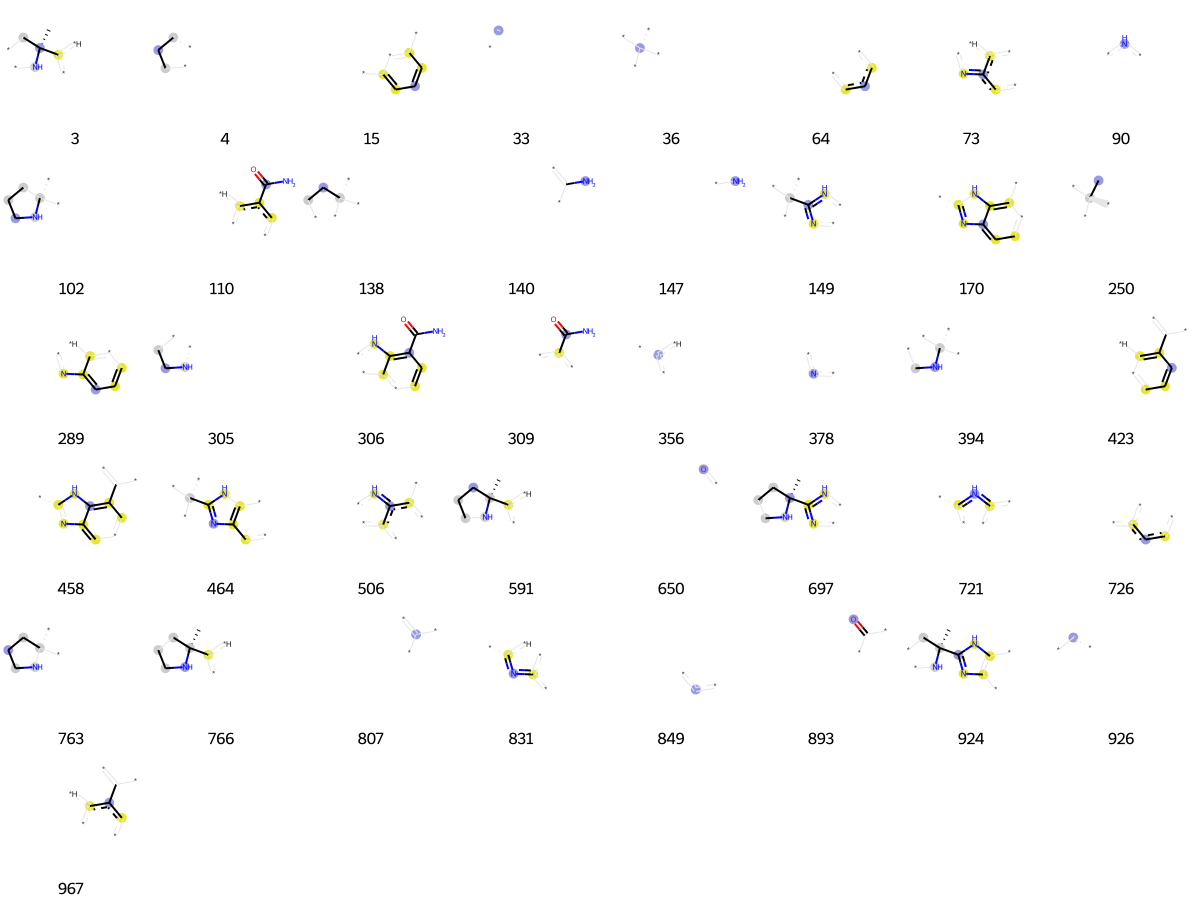

In [5226]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [5227]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 19,
 33,
 42,
 64,
 80,
 121,
 139,
 237,
 240,
 249,
 276,
 280,
 283,
 300,
 341,
 356,
 378,
 437,
 440,
 507,
 511,
 543,
 552,
 562,
 571,
 579,
 598,
 645,
 652,
 663,
 675,
 693,
 698,
 723,
 726,
 730,
 734,
 780,
 786,
 831,
 842,
 849,
 875,
 881,
 927,
 930,
 964,
 980,
 1007,
 1008,
 1010]

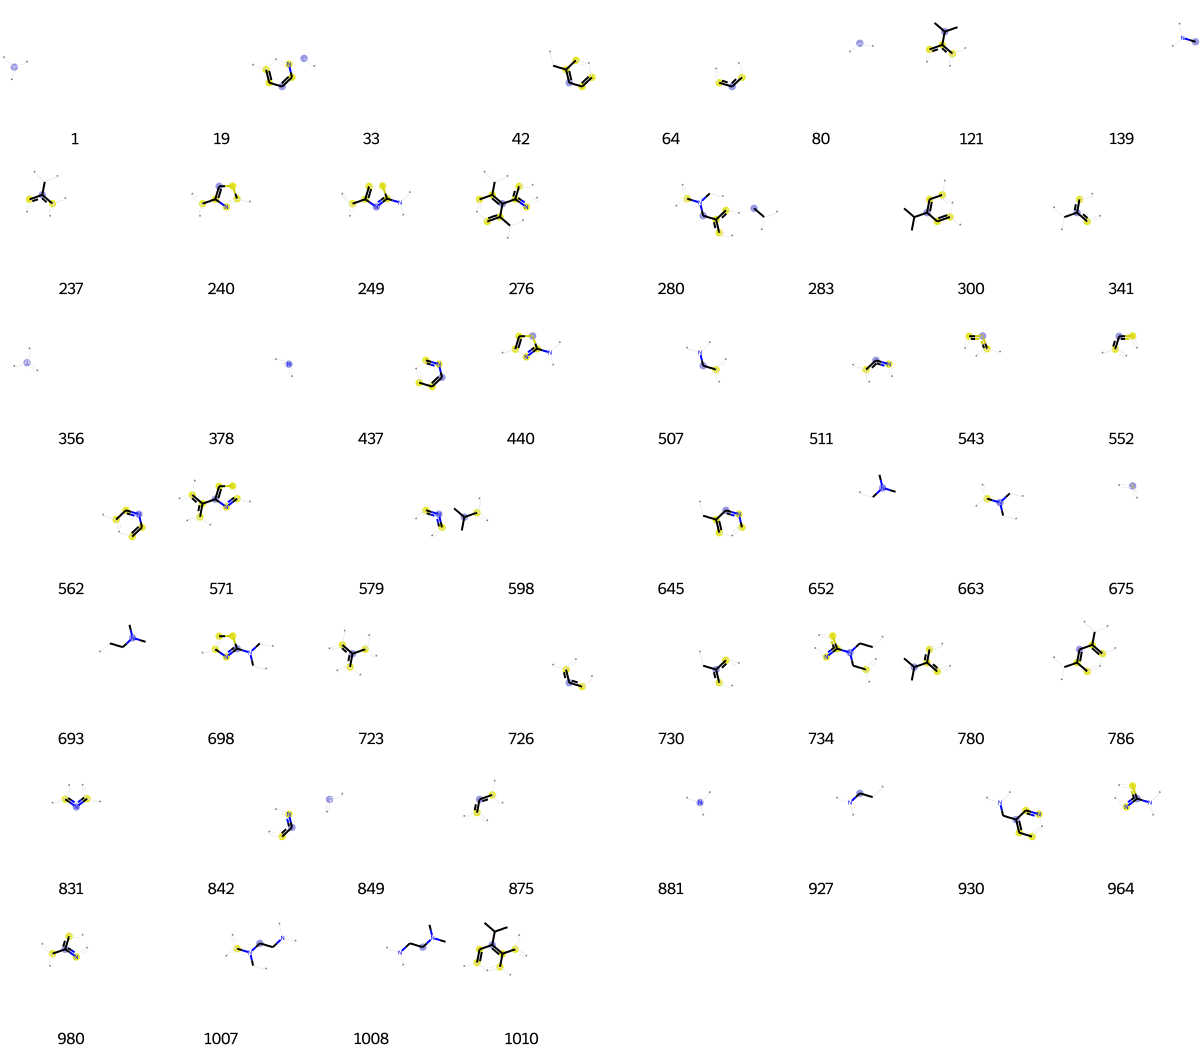

In [5228]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [5229]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[11,
 15,
 23,
 33,
 64,
 233,
 333,
 356,
 367,
 389,
 423,
 456,
 538,
 541,
 650,
 695,
 698,
 705,
 726,
 751,
 807,
 849,
 883,
 893,
 967,
 975,
 1017]

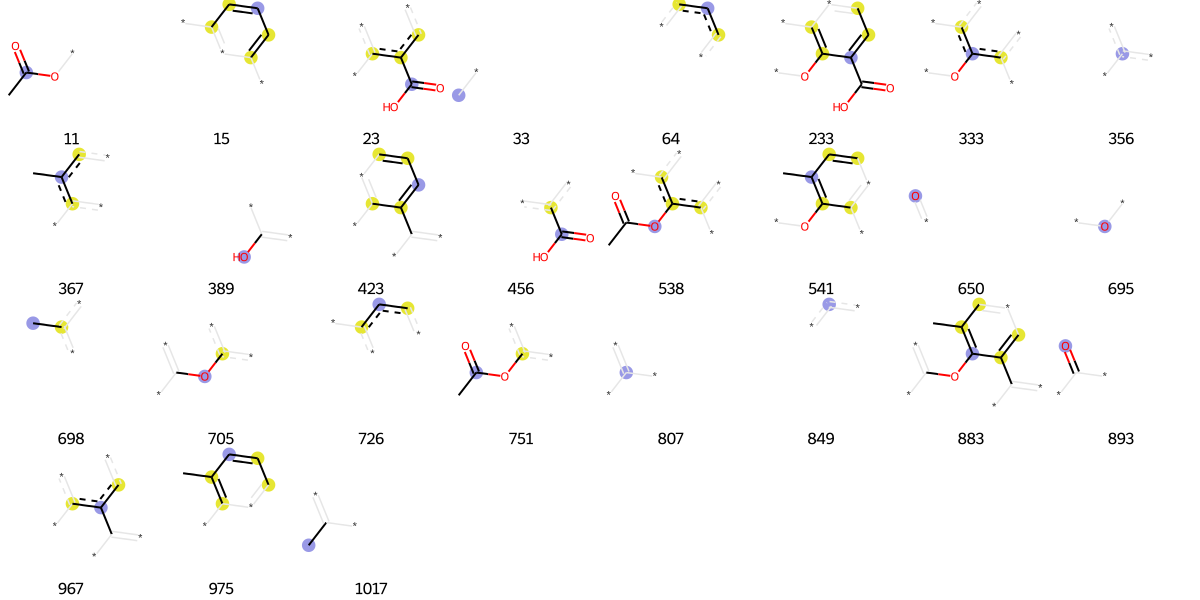

In [5230]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [5231]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[14,
 33,
 80,
 119,
 128,
 140,
 144,
 145,
 147,
 214,
 243,
 294,
 322,
 350,
 351,
 356,
 361,
 362,
 375,
 422,
 452,
 498,
 540,
 592,
 606,
 650,
 673,
 692,
 695,
 698,
 705,
 718,
 720,
 725,
 726,
 759,
 807,
 849,
 887,
 893,
 902,
 914,
 978,
 980,
 1013]

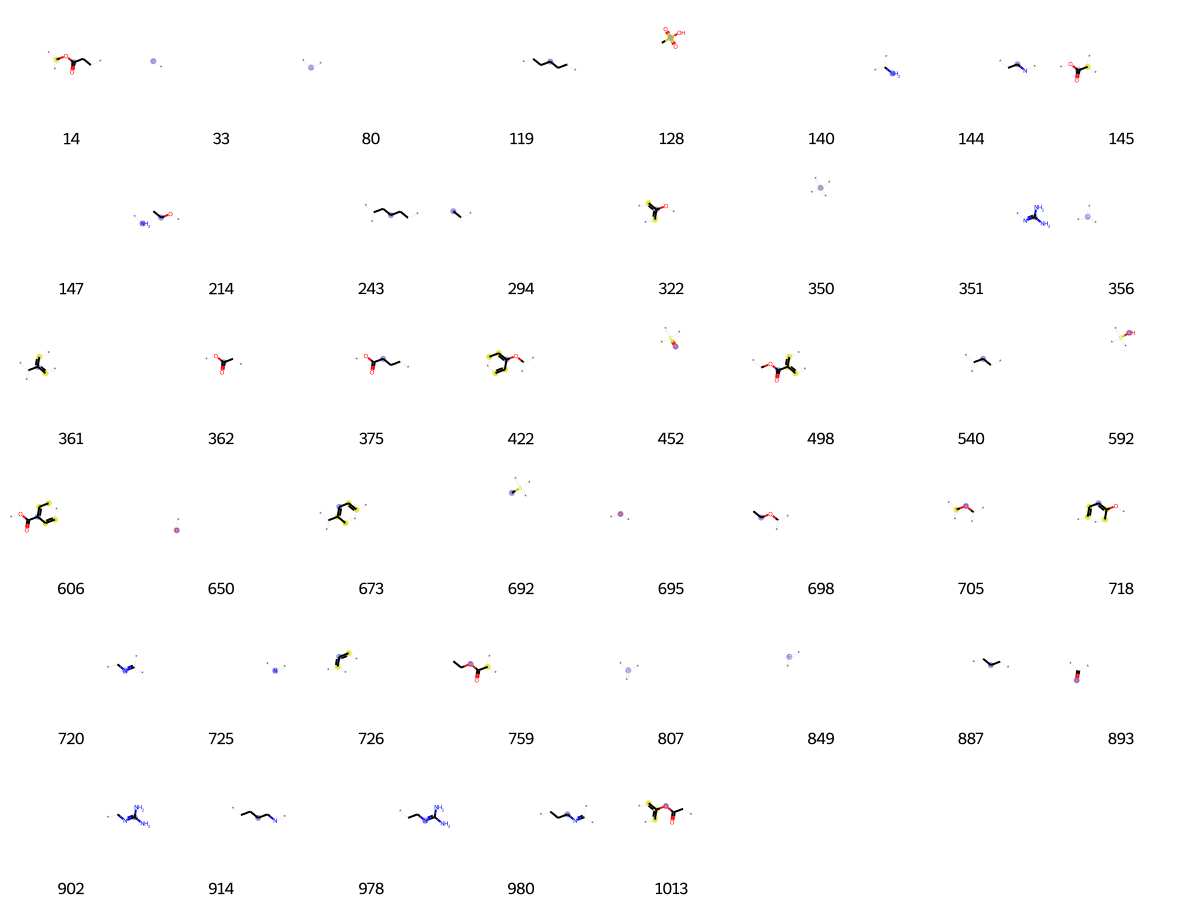

In [5232]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [5233]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 4,
 15,
 33,
 36,
 42,
 62,
 64,
 80,
 134,
 135,
 138,
 175,
 195,
 273,
 283,
 284,
 319,
 320,
 322,
 325,
 356,
 366,
 369,
 378,
 386,
 387,
 389,
 426,
 456,
 484,
 507,
 530,
 555,
 556,
 559,
 561,
 562,
 566,
 575,
 602,
 604,
 635,
 650,
 659,
 664,
 666,
 695,
 726,
 730,
 772,
 795,
 798,
 802,
 807,
 818,
 842,
 849,
 856,
 875,
 893,
 926,
 931,
 935,
 941,
 954,
 985,
 1009]

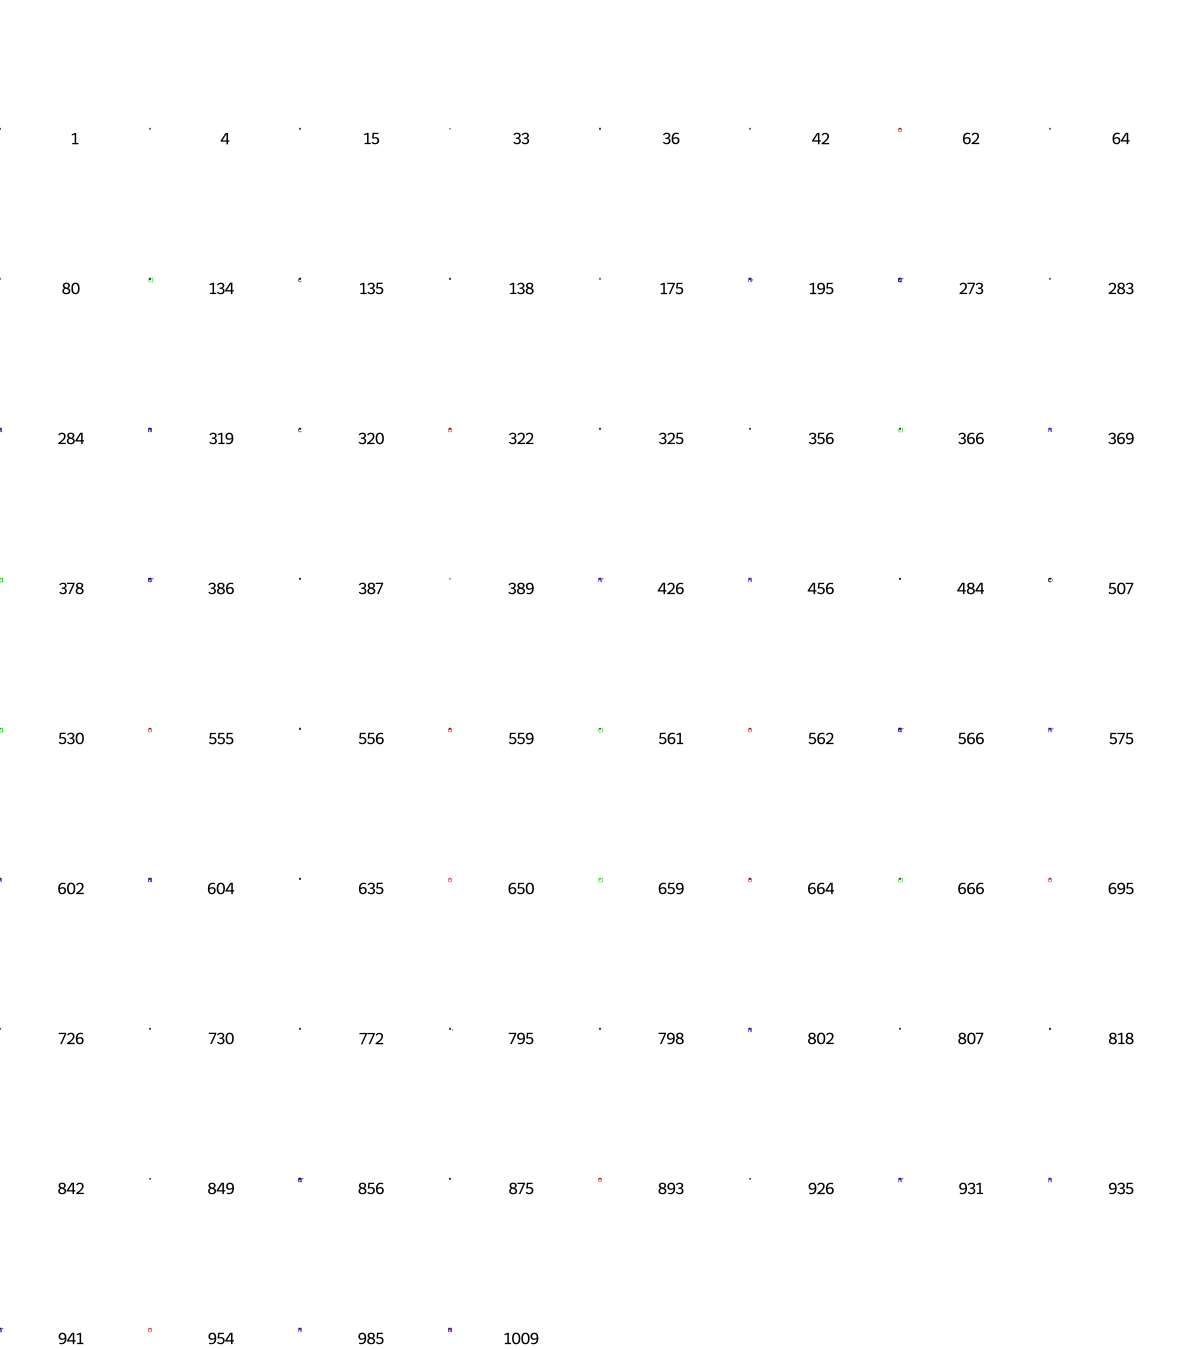

In [5234]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [5235]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 80,
 86,
 90,
 102,
 105,
 112,
 119,
 266,
 275,
 305,
 310,
 333,
 352,
 356,
 360,
 372,
 378,
 381,
 386,
 417,
 428,
 456,
 511,
 523,
 578,
 656,
 674,
 721,
 723,
 726,
 730,
 741,
 747,
 763,
 767,
 784,
 790,
 791,
 807,
 825,
 849,
 875,
 885,
 915,
 926,
 930,
 935,
 950,
 951,
 980]

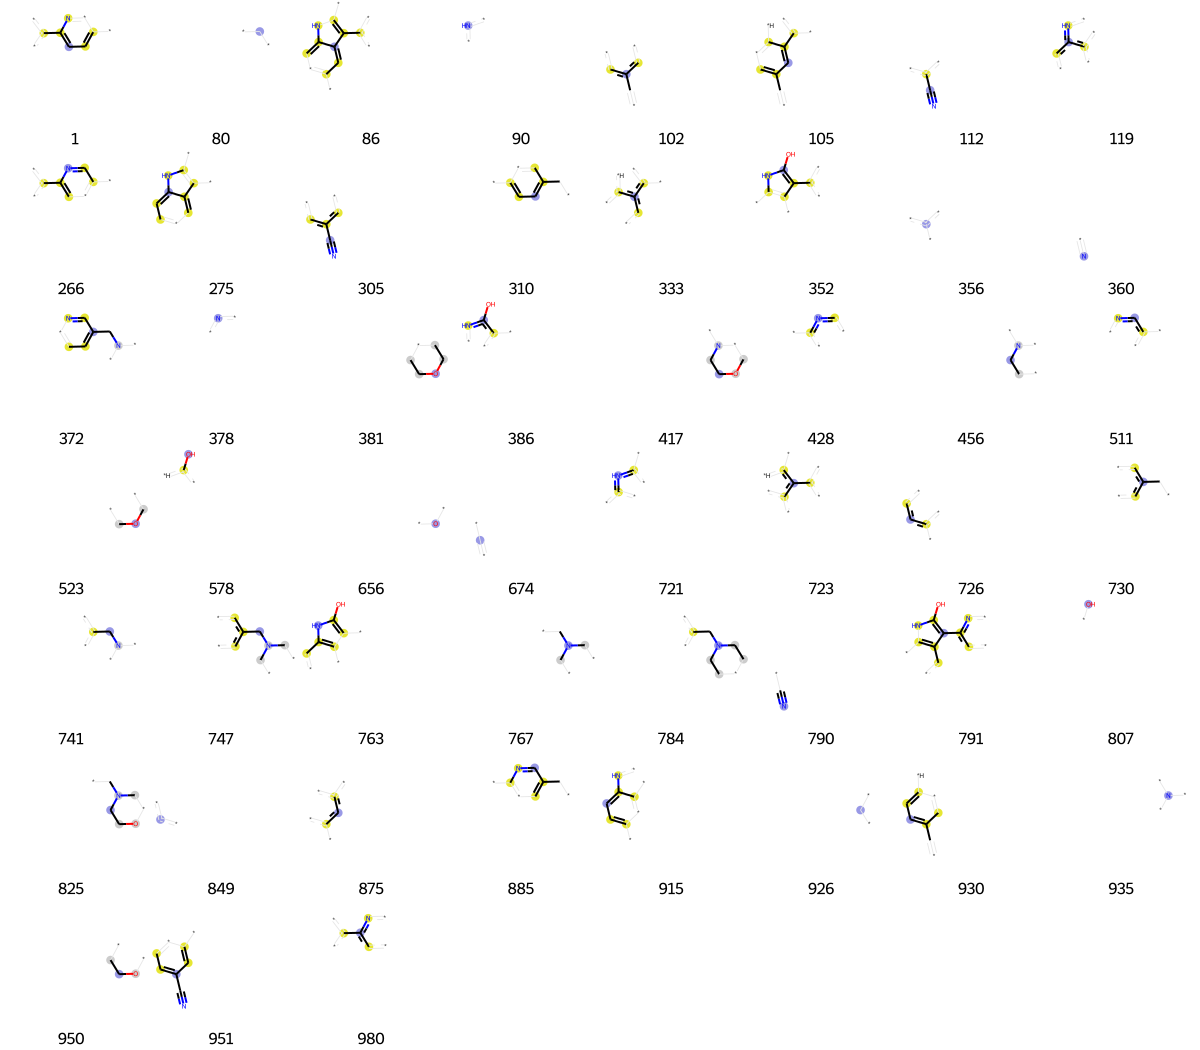

In [5236]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [5237]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 7,
 10,
 23,
 36,
 102,
 112,
 136,
 141,
 248,
 265,
 266,
 285,
 305,
 356,
 360,
 361,
 378,
 386,
 428,
 511,
 518,
 607,
 646,
 656,
 674,
 699,
 726,
 746,
 767,
 790,
 818,
 831,
 849,
 875,
 883,
 886,
 904,
 969,
 980]

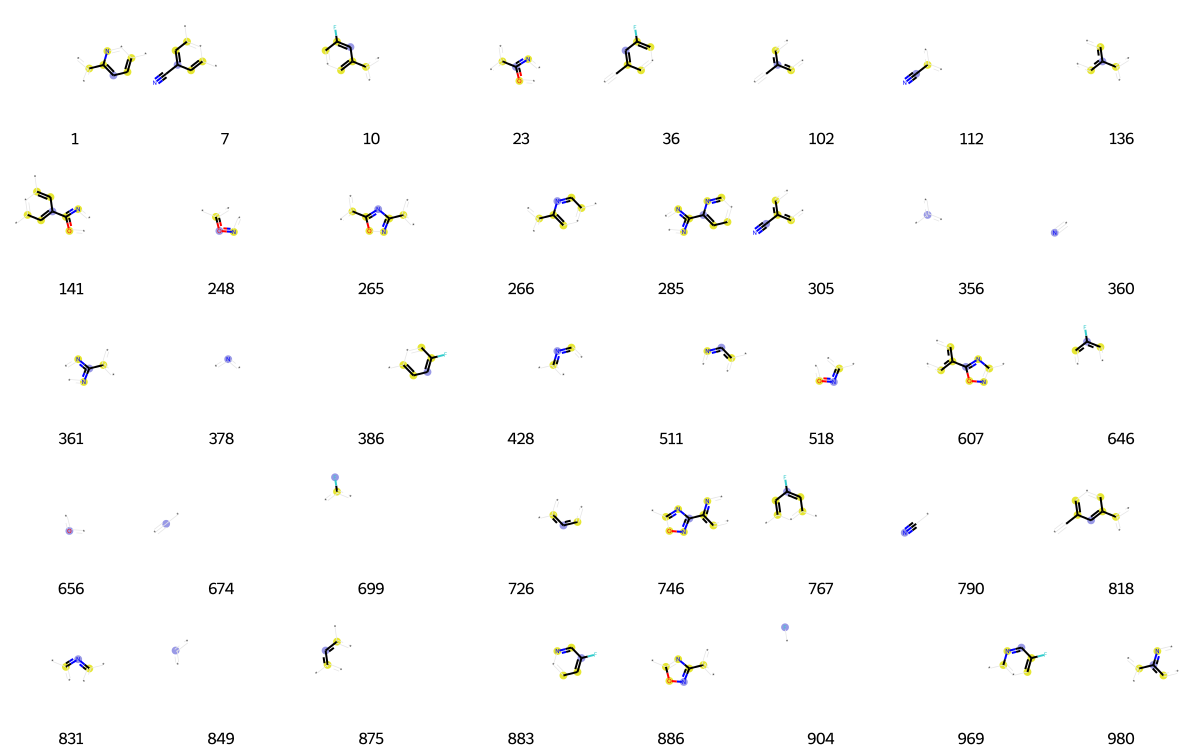

In [5238]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [5239]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[3,
 33,
 34,
 41,
 58,
 80,
 98,
 103,
 114,
 128,
 134,
 144,
 147,
 159,
 214,
 233,
 236,
 239,
 268,
 271,
 294,
 344,
 351,
 356,
 393,
 404,
 429,
 430,
 444,
 475,
 498,
 507,
 510,
 521,
 528,
 641,
 650,
 662,
 666,
 690,
 695,
 698,
 726,
 730,
 807,
 809,
 841,
 849,
 860,
 875,
 881,
 891,
 893,
 903,
 904,
 926,
 935,
 1019]

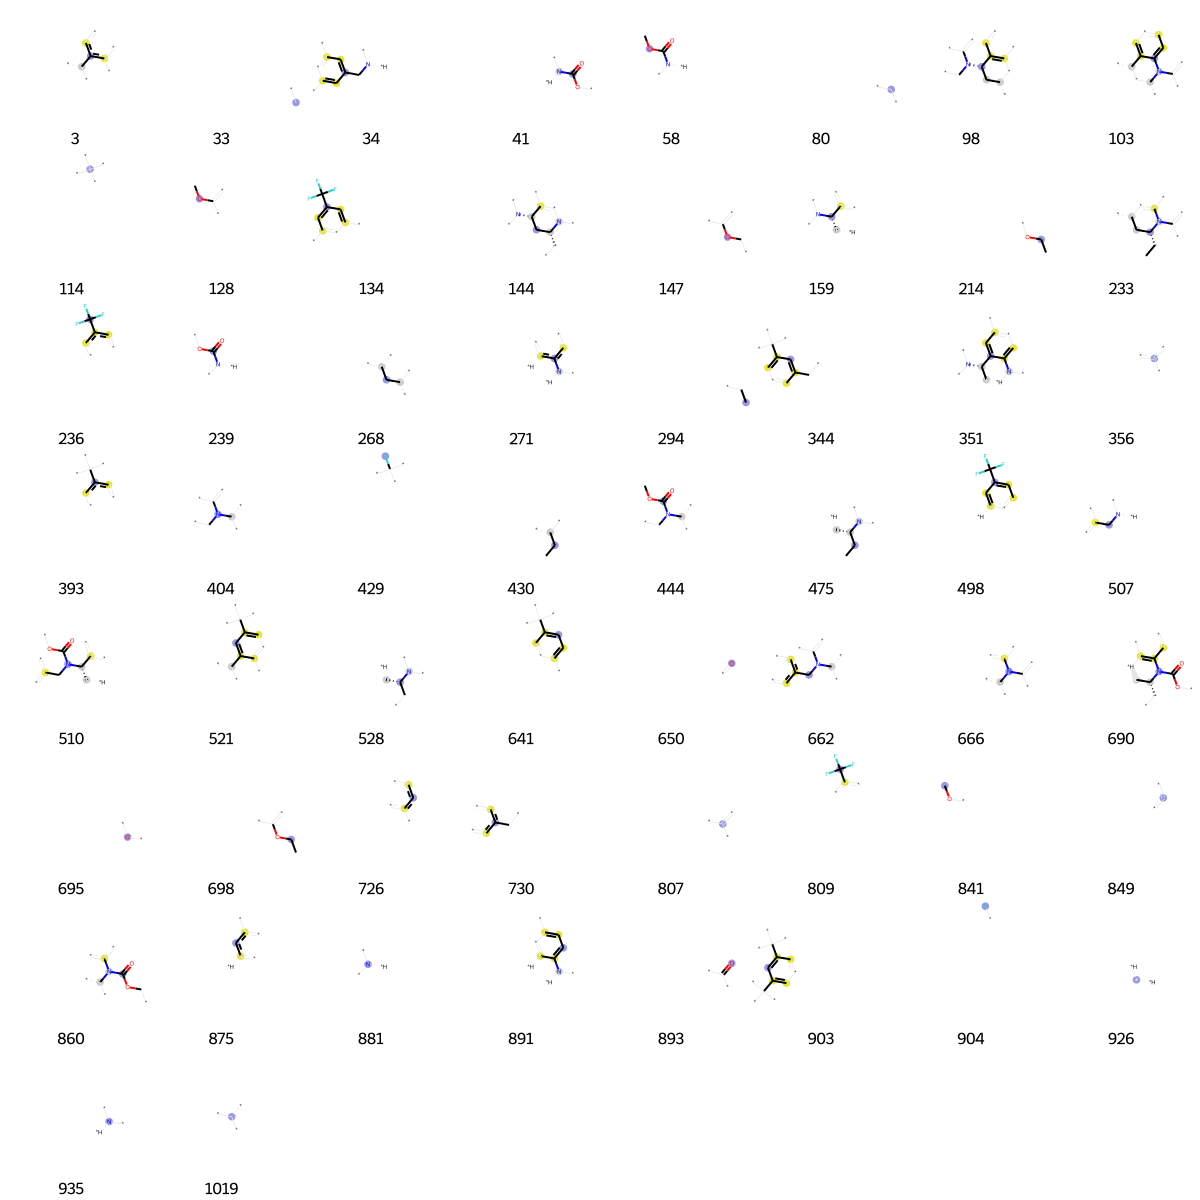

In [5240]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [5241]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 33,
 39,
 67,
 80,
 94,
 118,
 133,
 178,
 202,
 219,
 227,
 232,
 283,
 294,
 314,
 329,
 333,
 356,
 365,
 389,
 428,
 456,
 578,
 580,
 603,
 612,
 638,
 647,
 650,
 656,
 658,
 669,
 675,
 695,
 702,
 709,
 726,
 730,
 794,
 796,
 806,
 807,
 849,
 875,
 887,
 893,
 920,
 946,
 954,
 967,
 1010,
 1014,
 1017]

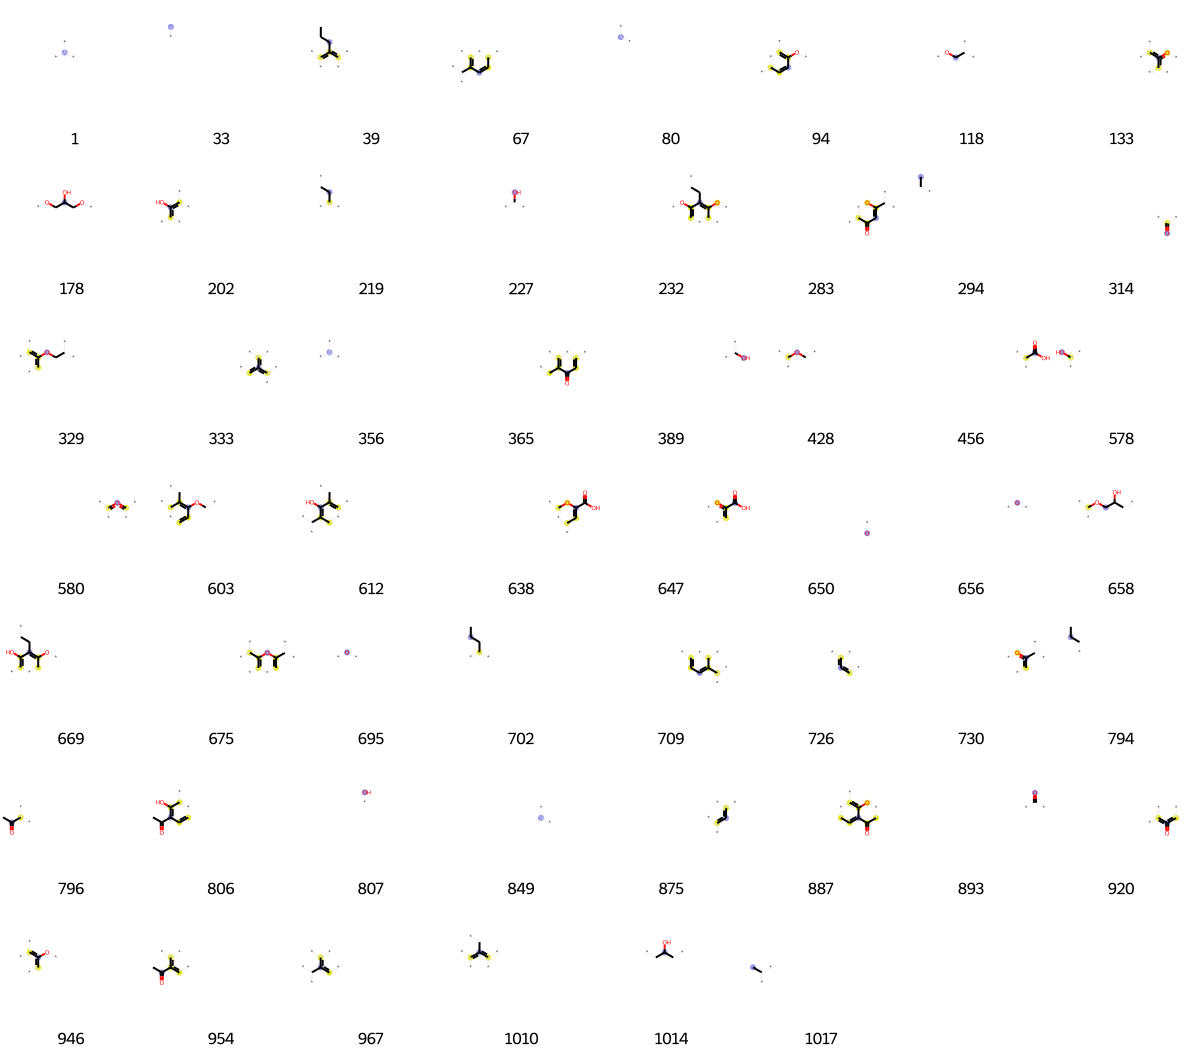

In [5242]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [5243]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[4,
 15,
 33,
 41,
 52,
 64,
 65,
 80,
 99,
 114,
 128,
 158,
 191,
 236,
 260,
 288,
 314,
 356,
 367,
 381,
 456,
 461,
 650,
 698,
 707,
 714,
 726,
 792,
 796,
 798,
 807,
 849,
 893,
 926,
 935,
 975]

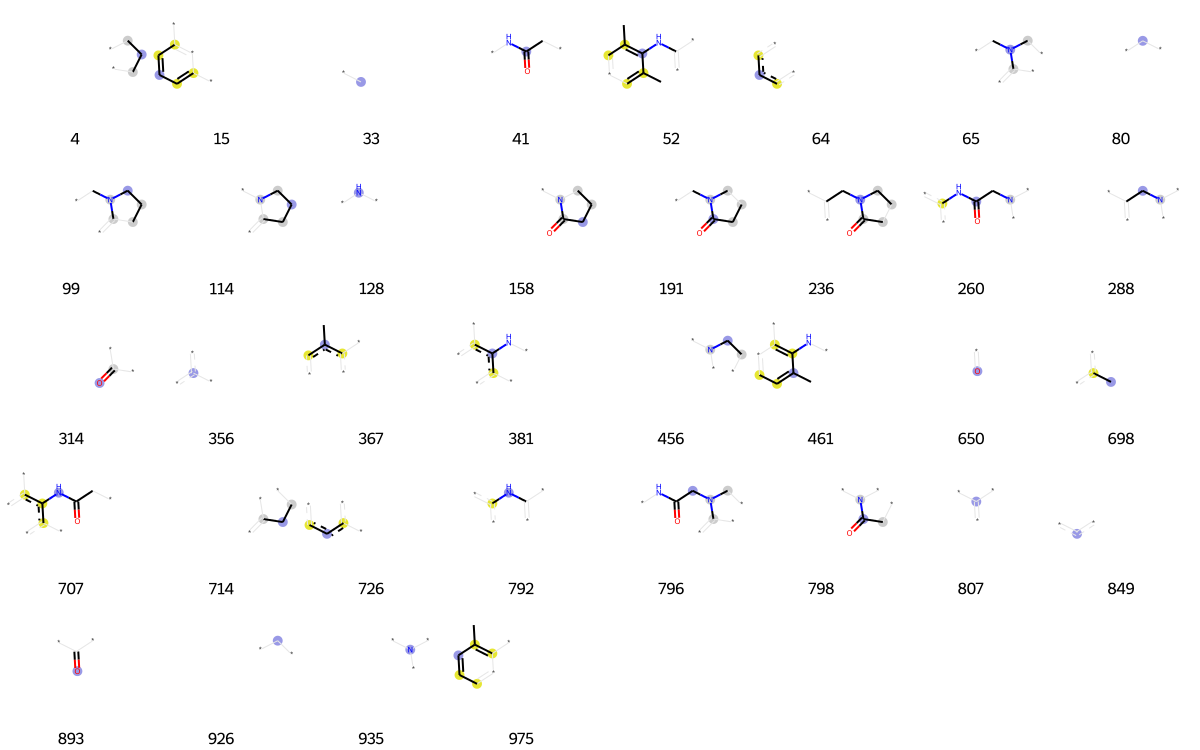

In [5244]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [5245]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[10,
 13,
 31,
 33,
 36,
 48,
 64,
 77,
 80,
 90,
 102,
 131,
 139,
 175,
 252,
 310,
 314,
 322,
 356,
 360,
 378,
 384,
 389,
 419,
 424,
 428,
 432,
 448,
 458,
 495,
 508,
 510,
 520,
 620,
 650,
 670,
 674,
 675,
 694,
 695,
 718,
 726,
 730,
 807,
 815,
 816,
 842,
 849,
 881,
 893,
 894,
 927,
 976,
 987,
 1019]

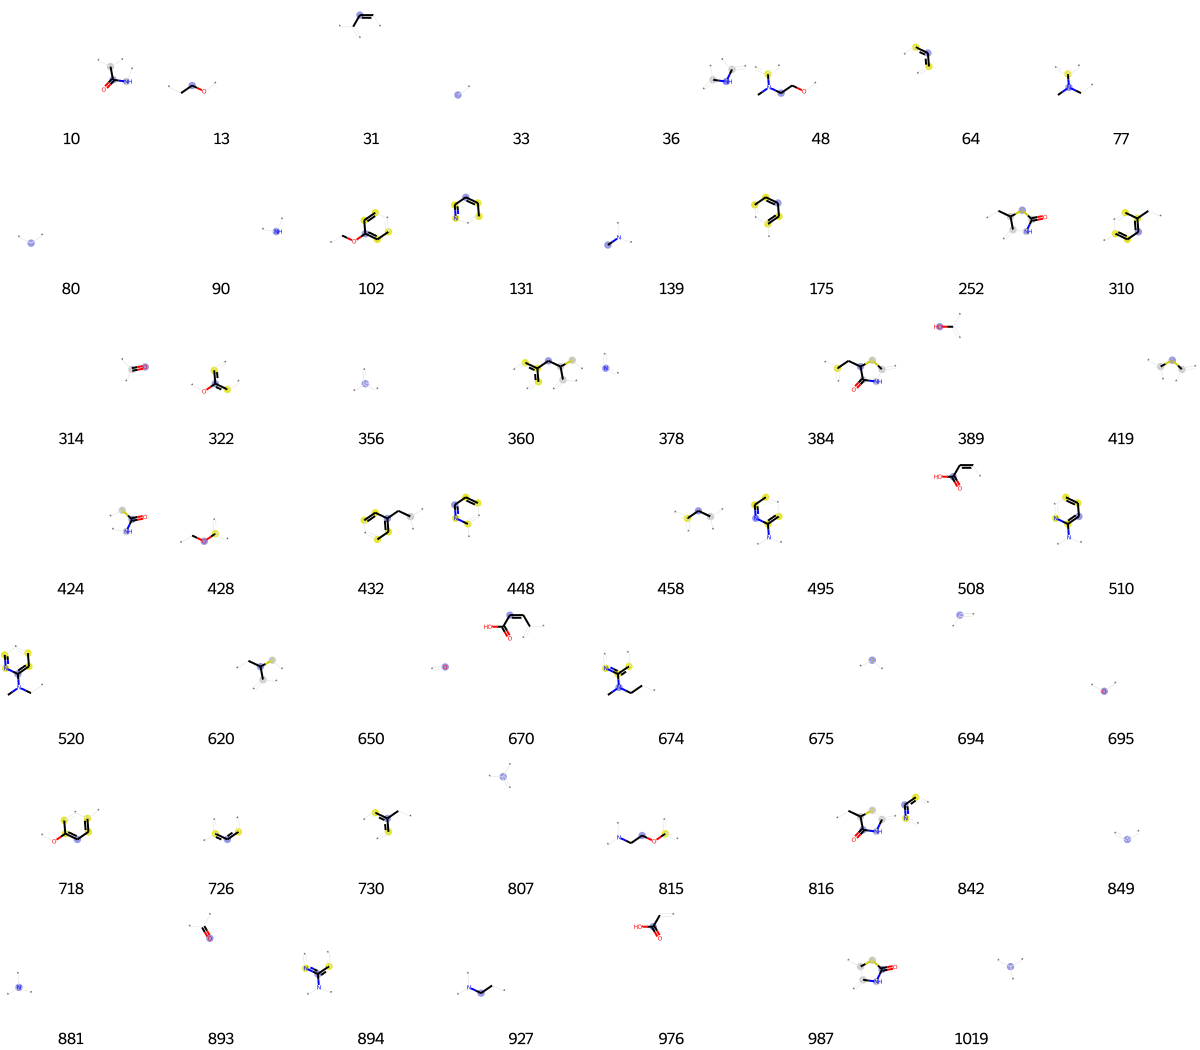

In [5246]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [5247]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[23,
 106,
 114,
 136,
 168,
 181,
 236,
 249,
 276,
 278,
 356,
 361,
 378,
 383,
 393,
 424,
 429,
 518,
 578,
 641,
 675,
 699,
 714,
 719,
 726,
 789,
 807,
 809,
 831,
 849,
 859,
 896,
 904,
 924,
 926,
 944,
 994]

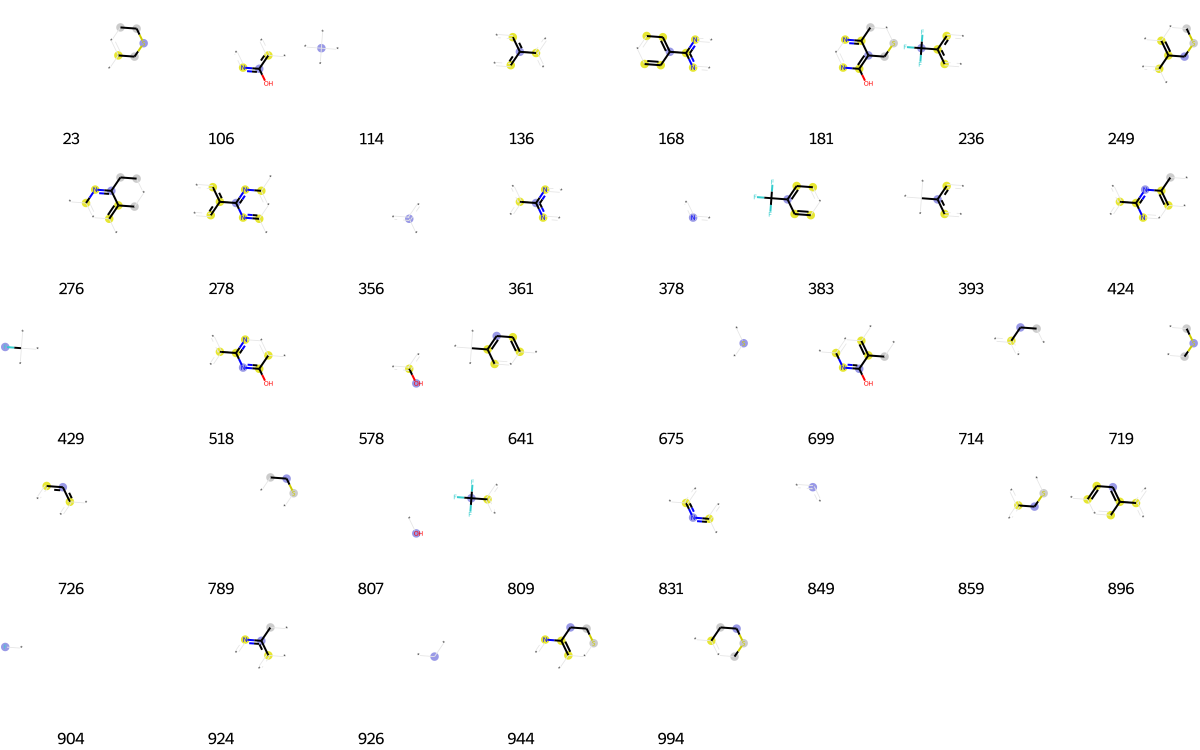

In [5248]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [5249]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[4,
 14,
 33,
 35,
 45,
 59,
 61,
 64,
 80,
 99,
 121,
 128,
 151,
 162,
 175,
 197,
 207,
 212,
 238,
 255,
 261,
 268,
 294,
 314,
 333,
 356,
 378,
 407,
 428,
 433,
 456,
 461,
 466,
 474,
 484,
 486,
 511,
 525,
 527,
 544,
 548,
 559,
 567,
 586,
 635,
 650,
 672,
 675,
 680,
 689,
 698,
 707,
 709,
 718,
 724,
 726,
 807,
 813,
 831,
 834,
 849,
 885,
 893,
 926,
 935,
 954,
 970,
 1008,
 1011]

In [5250]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[18,
 19,
 64,
 126,
 333,
 356,
 378,
 394,
 428,
 448,
 451,
 454,
 549,
 578,
 583,
 650,
 700,
 725,
 726,
 797,
 807,
 842,
 849,
 864,
 915,
 935,
 975,
 979]

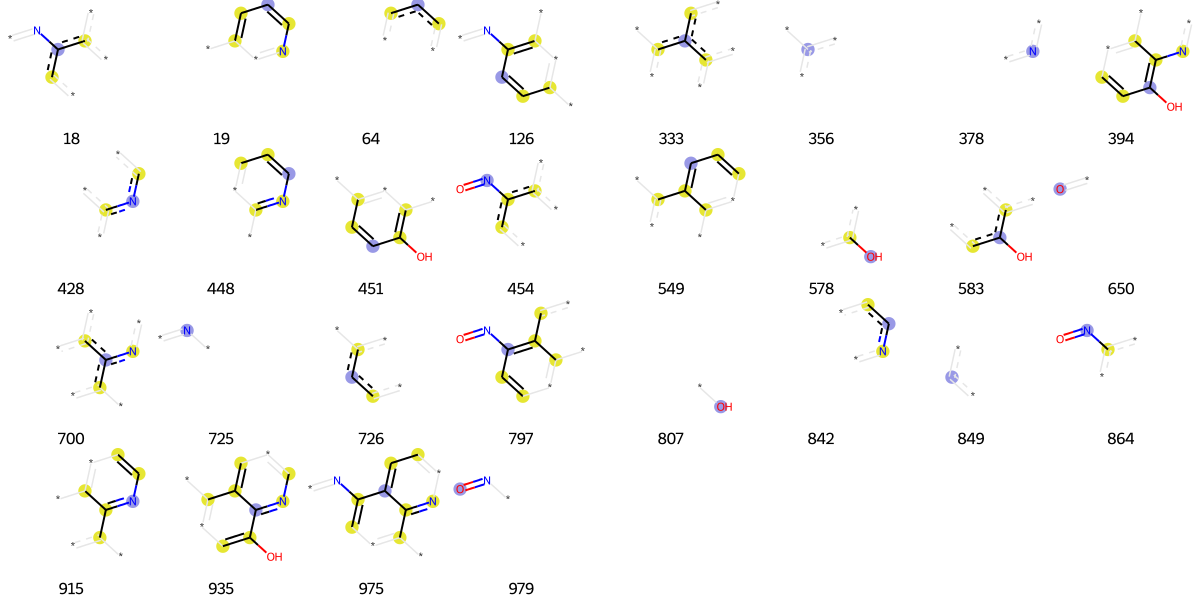

In [5251]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [5252]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 19,
 33,
 40,
 64,
 112,
 114,
 116,
 128,
 171,
 191,
 212,
 218,
 262,
 271,
 322,
 356,
 360,
 363,
 375,
 377,
 378,
 394,
 408,
 419,
 429,
 437,
 456,
 511,
 562,
 579,
 607,
 650,
 682,
 699,
 703,
 714,
 726,
 792,
 793,
 807,
 809,
 842,
 849,
 860,
 864,
 875,
 893,
 904,
 926,
 935,
 981]

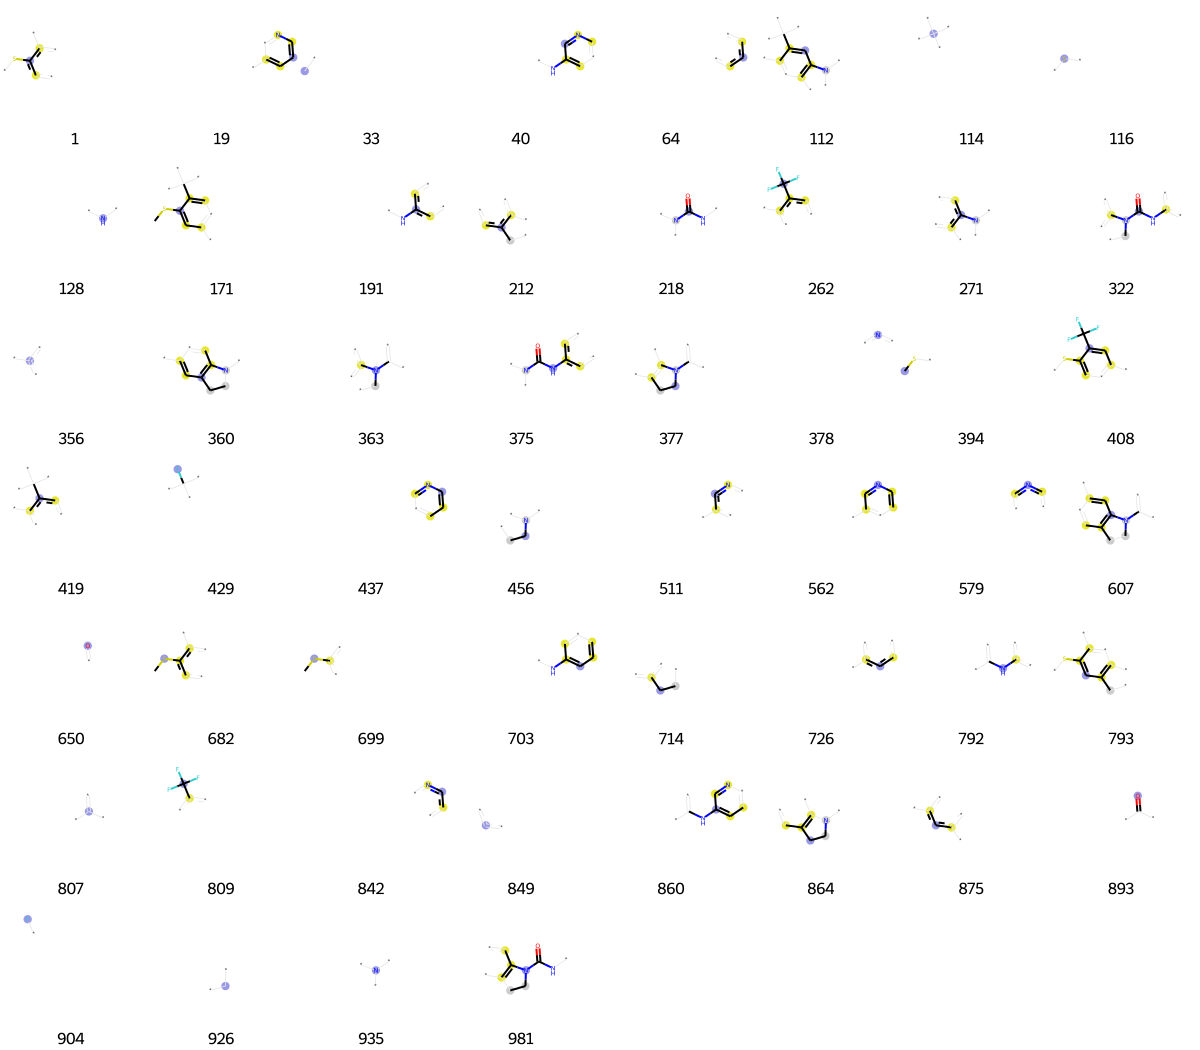

In [5253]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [5254]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 33,
 43,
 60,
 61,
 66,
 74,
 80,
 90,
 119,
 121,
 122,
 125,
 142,
 197,
 200,
 205,
 222,
 226,
 283,
 322,
 333,
 356,
 366,
 378,
 423,
 464,
 473,
 480,
 511,
 561,
 568,
 573,
 579,
 584,
 602,
 625,
 632,
 636,
 659,
 664,
 694,
 695,
 718,
 726,
 747,
 807,
 813,
 835,
 849,
 853,
 875,
 893,
 915,
 935,
 980,
 984,
 985,
 1009]

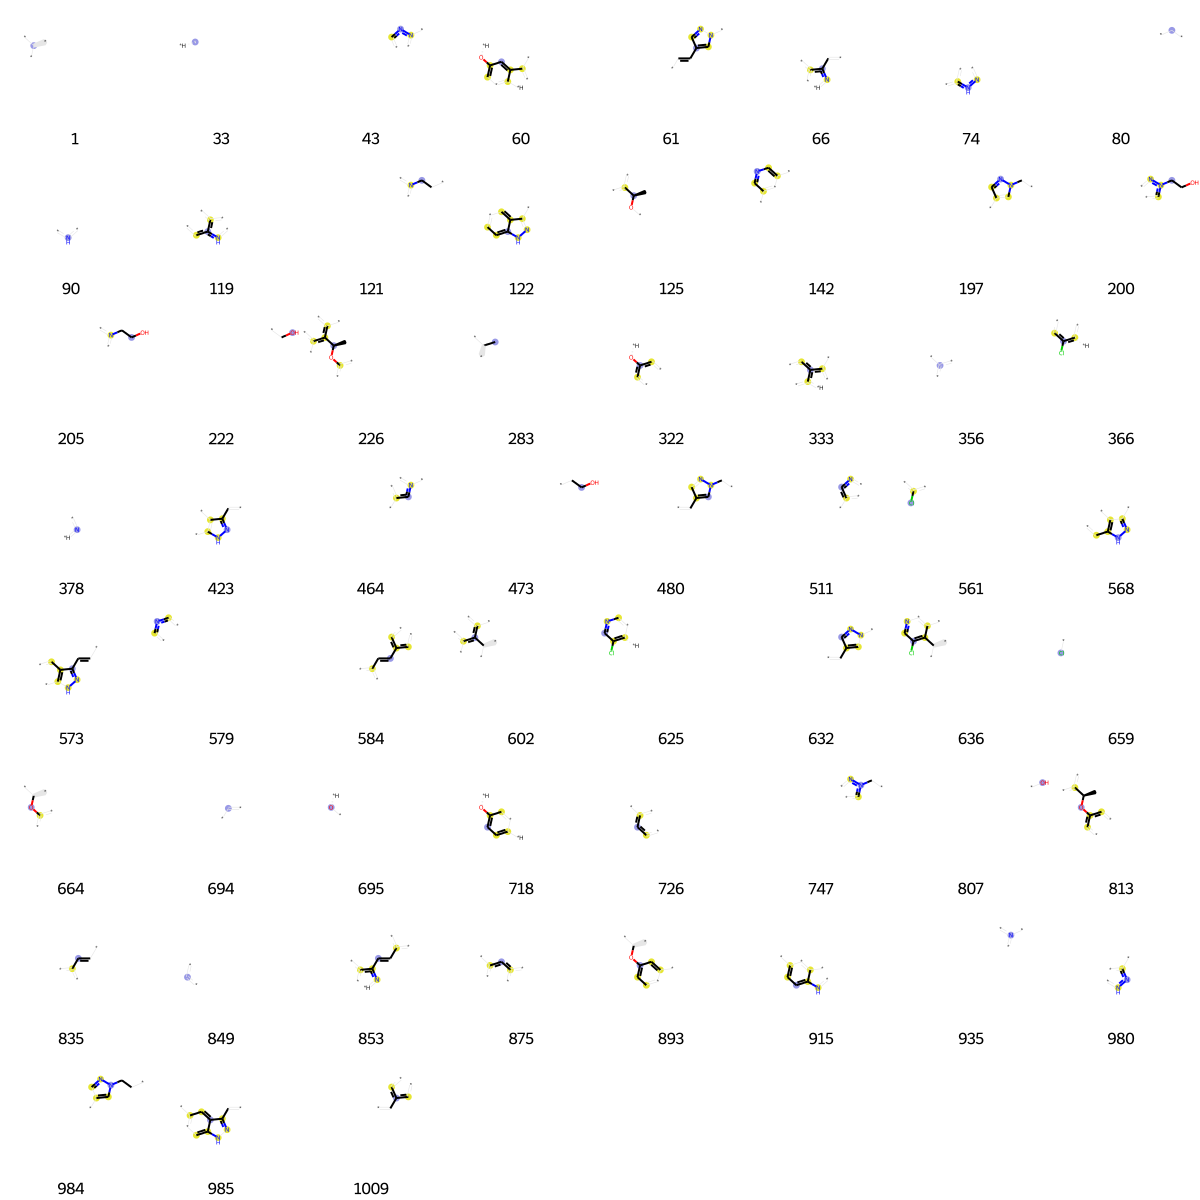

In [5255]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [5256]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 69,
 77,
 80,
 89,
 90,
 114,
 118,
 119,
 125,
 128,
 145,
 175,
 186,
 216,
 275,
 315,
 329,
 333,
 356,
 361,
 386,
 389,
 392,
 428,
 496,
 503,
 554,
 603,
 606,
 625,
 650,
 656,
 695,
 698,
 721,
 726,
 759,
 807,
 821,
 843,
 849,
 875,
 882,
 893,
 946,
 961,
 1023]

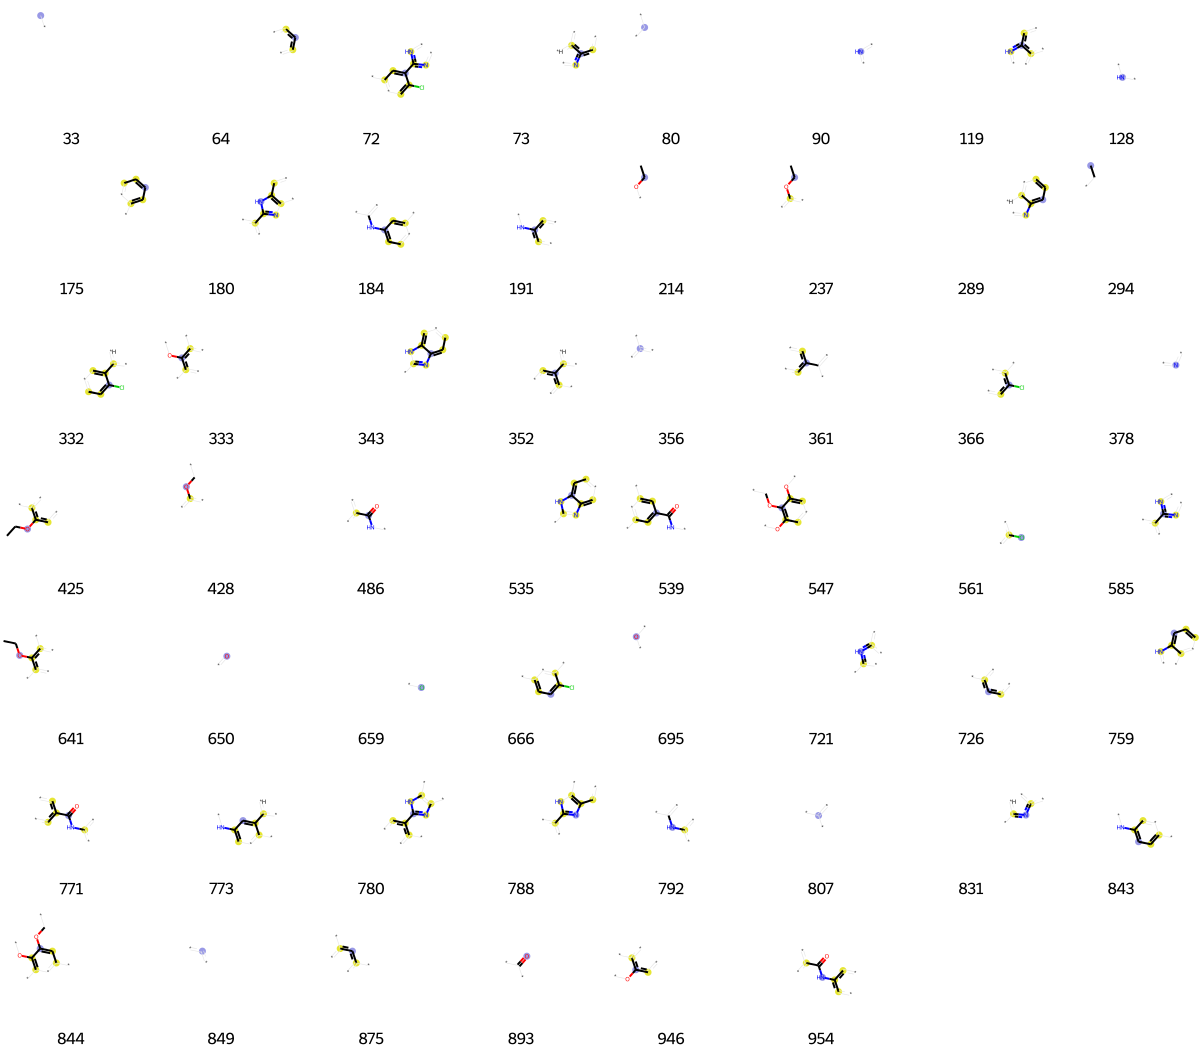

In [5257]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [5258]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 64,
 73,
 116,
 128,
 131,
 162,
 175,
 204,
 298,
 314,
 317,
 339,
 341,
 356,
 370,
 378,
 385,
 389,
 394,
 557,
 573,
 600,
 609,
 650,
 657,
 675,
 699,
 716,
 726,
 746,
 757,
 792,
 807,
 831,
 849,
 893,
 954,
 961,
 999]

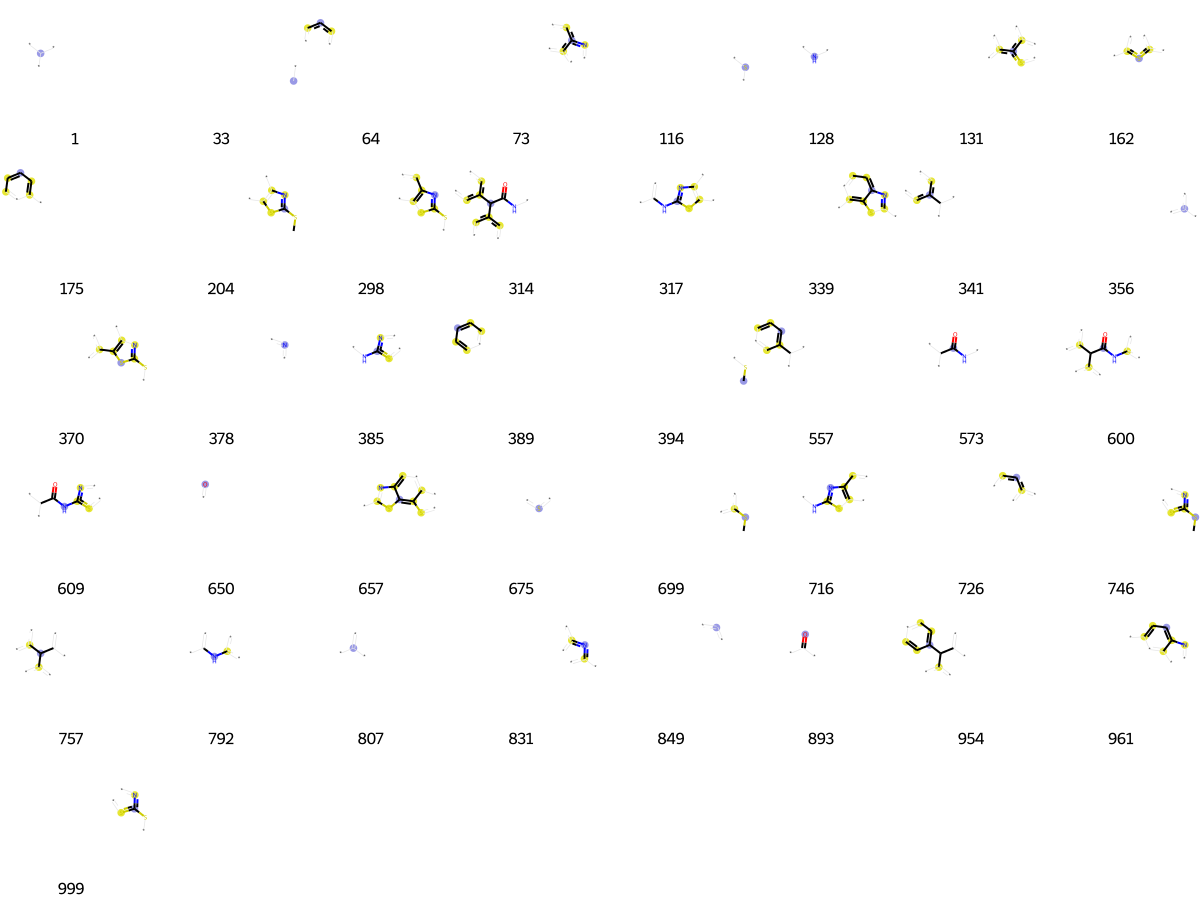

In [5259]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [5260]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[22,
 32,
 36,
 46,
 62,
 77,
 80,
 85,
 119,
 147,
 152,
 222,
 233,
 236,
 279,
 314,
 333,
 356,
 378,
 389,
 404,
 415,
 424,
 433,
 485,
 498,
 502,
 569,
 577,
 588,
 606,
 650,
 656,
 659,
 720,
 726,
 807,
 831,
 849,
 863,
 904,
 935,
 1018,
 1019]

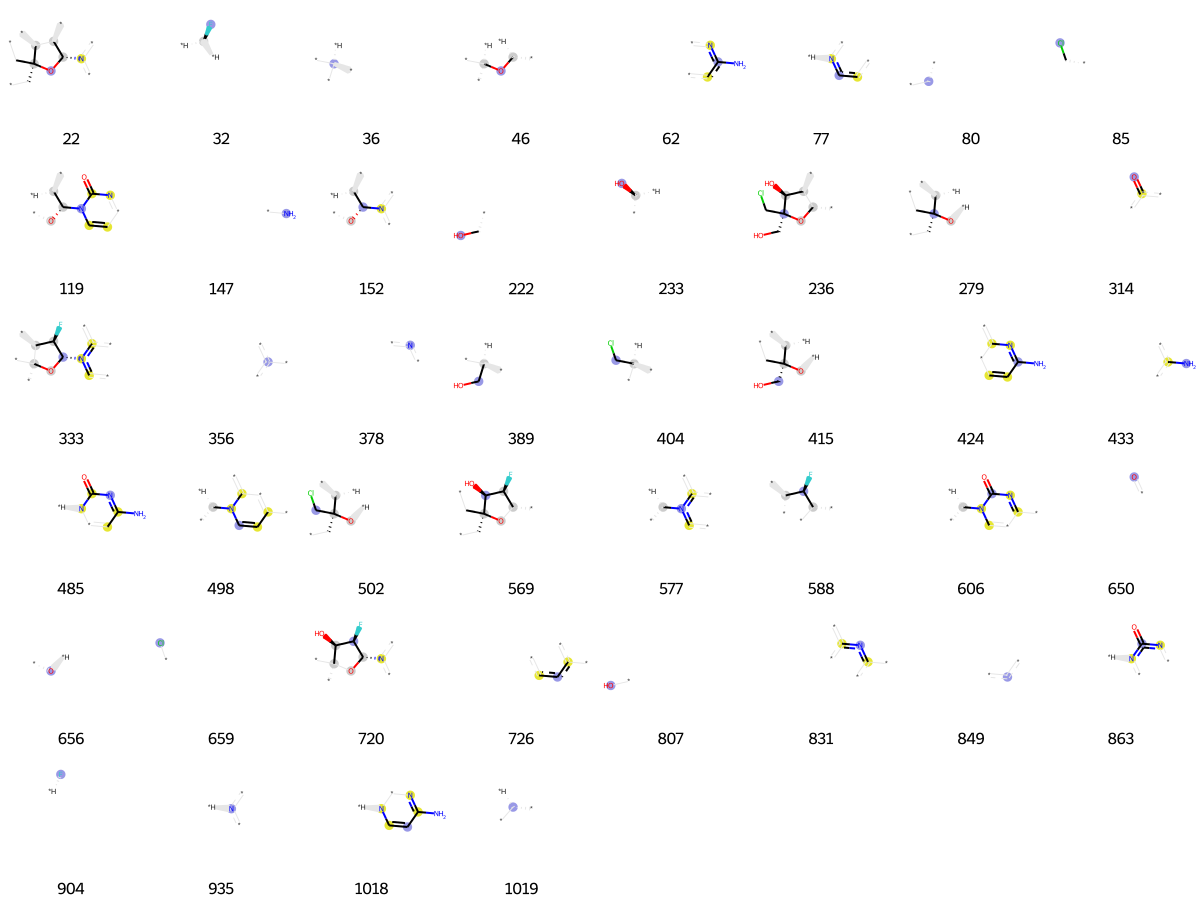

In [5261]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [5262]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[39,
 80,
 90,
 94,
 184,
 356,
 378,
 380,
 383,
 406,
 493,
 511,
 579,
 713,
 726,
 730,
 806,
 842,
 849,
 867,
 892,
 918,
 953,
 973]

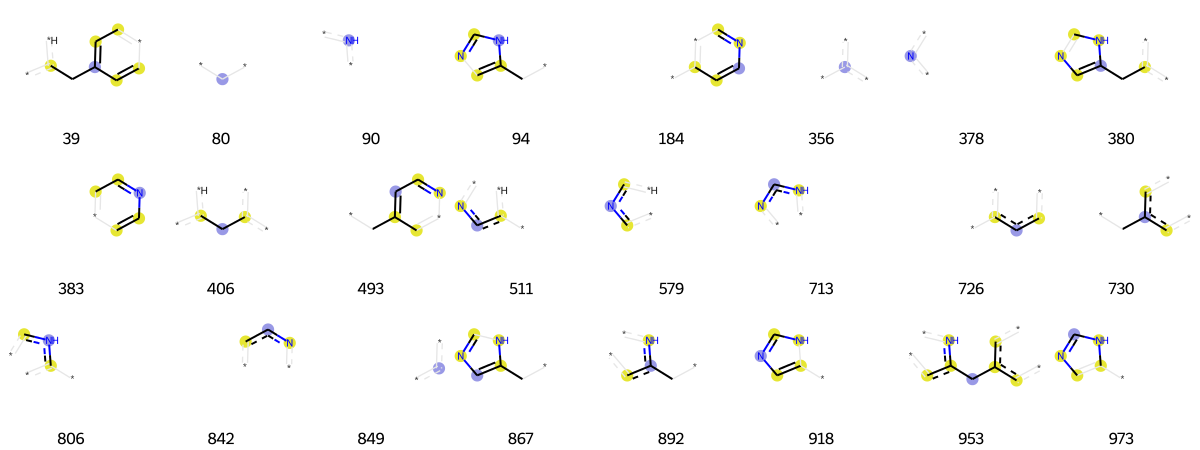

In [5263]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [5264]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 33,
 34,
 40,
 63,
 80,
 128,
 197,
 202,
 268,
 294,
 301,
 325,
 333,
 343,
 356,
 366,
 398,
 431,
 446,
 456,
 466,
 486,
 512,
 514,
 528,
 561,
 575,
 578,
 580,
 586,
 650,
 659,
 676,
 690,
 695,
 775,
 807,
 841,
 849,
 875,
 893,
 926,
 935,
 967,
 984,
 994,
 998,
 1001,
 1019,
 1021]

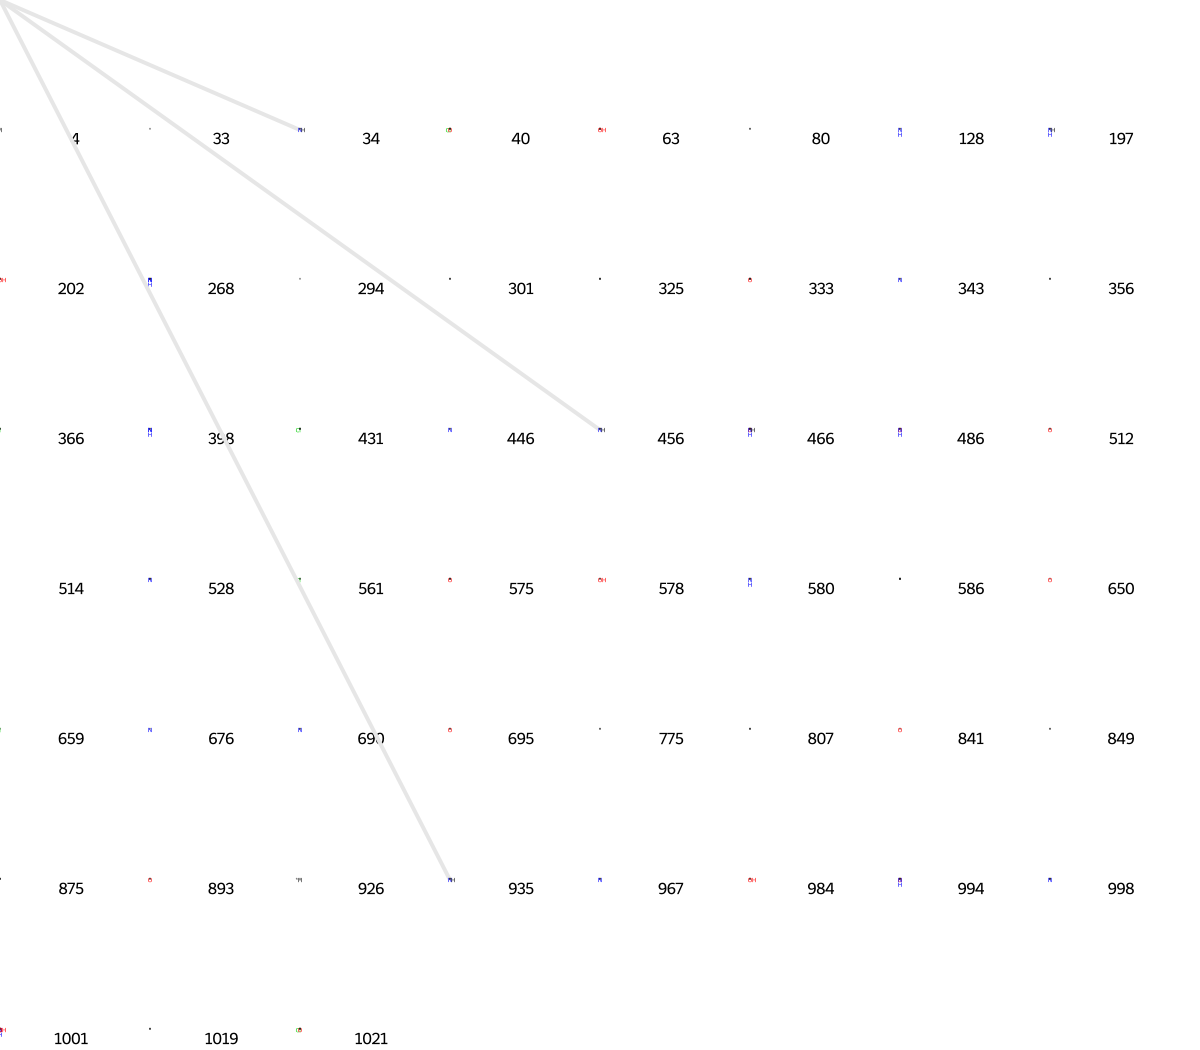

In [5265]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [5266]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[12,
 31,
 33,
 75,
 80,
 90,
 128,
 147,
 200,
 213,
 214,
 255,
 259,
 276,
 294,
 302,
 310,
 356,
 378,
 386,
 389,
 392,
 433,
 435,
 508,
 550,
 638,
 646,
 650,
 670,
 694,
 695,
 698,
 699,
 726,
 730,
 734,
 792,
 807,
 831,
 832,
 849,
 893,
 904,
 967,
 976,
 980,
 1013]

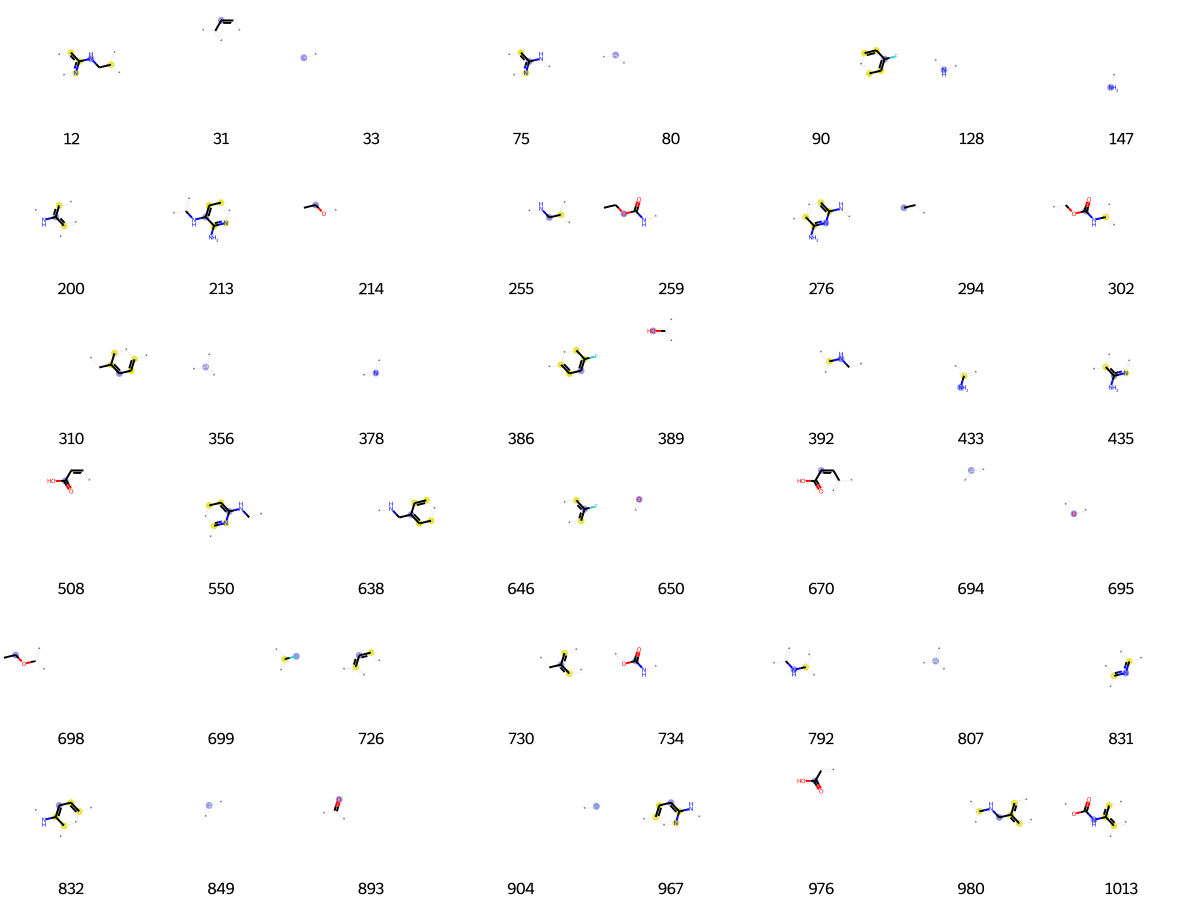

In [5267]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [5268]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[21,
 80,
 90,
 116,
 121,
 128,
 144,
 158,
 197,
 219,
 310,
 331,
 353,
 356,
 378,
 428,
 462,
 470,
 483,
 503,
 523,
 570,
 575,
 623,
 625,
 638,
 661,
 667,
 713,
 724,
 726,
 730,
 734,
 774,
 777,
 807,
 828,
 849,
 855,
 860,
 887,
 931,
 947,
 999]

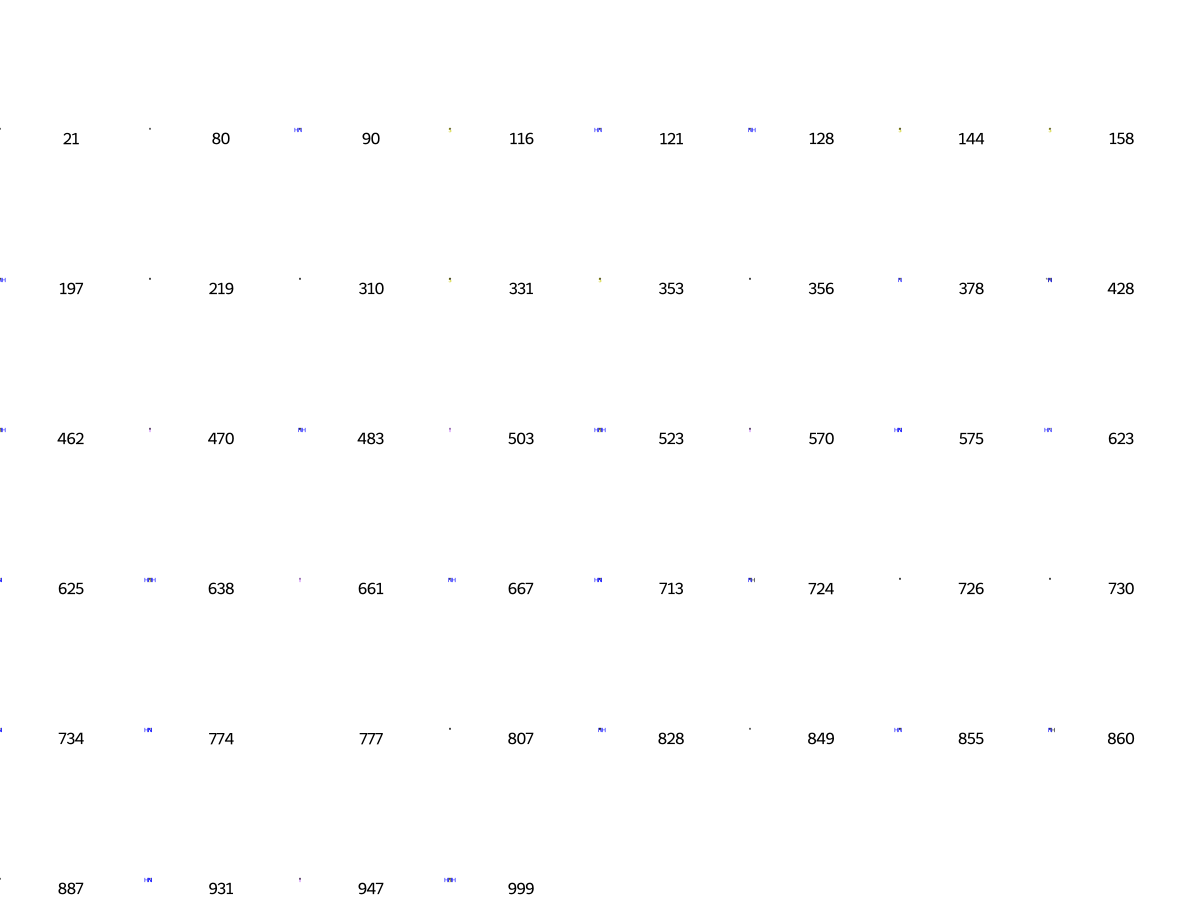

In [5269]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [5270]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[4,
 11,
 24,
 33,
 64,
 128,
 165,
 175,
 212,
 216,
 218,
 245,
 248,
 271,
 356,
 363,
 405,
 457,
 536,
 561,
 601,
 650,
 656,
 659,
 684,
 726,
 745,
 759,
 786,
 807,
 816,
 849,
 875,
 881,
 884,
 893,
 914,
 922,
 926,
 935,
 1012,
 1017]

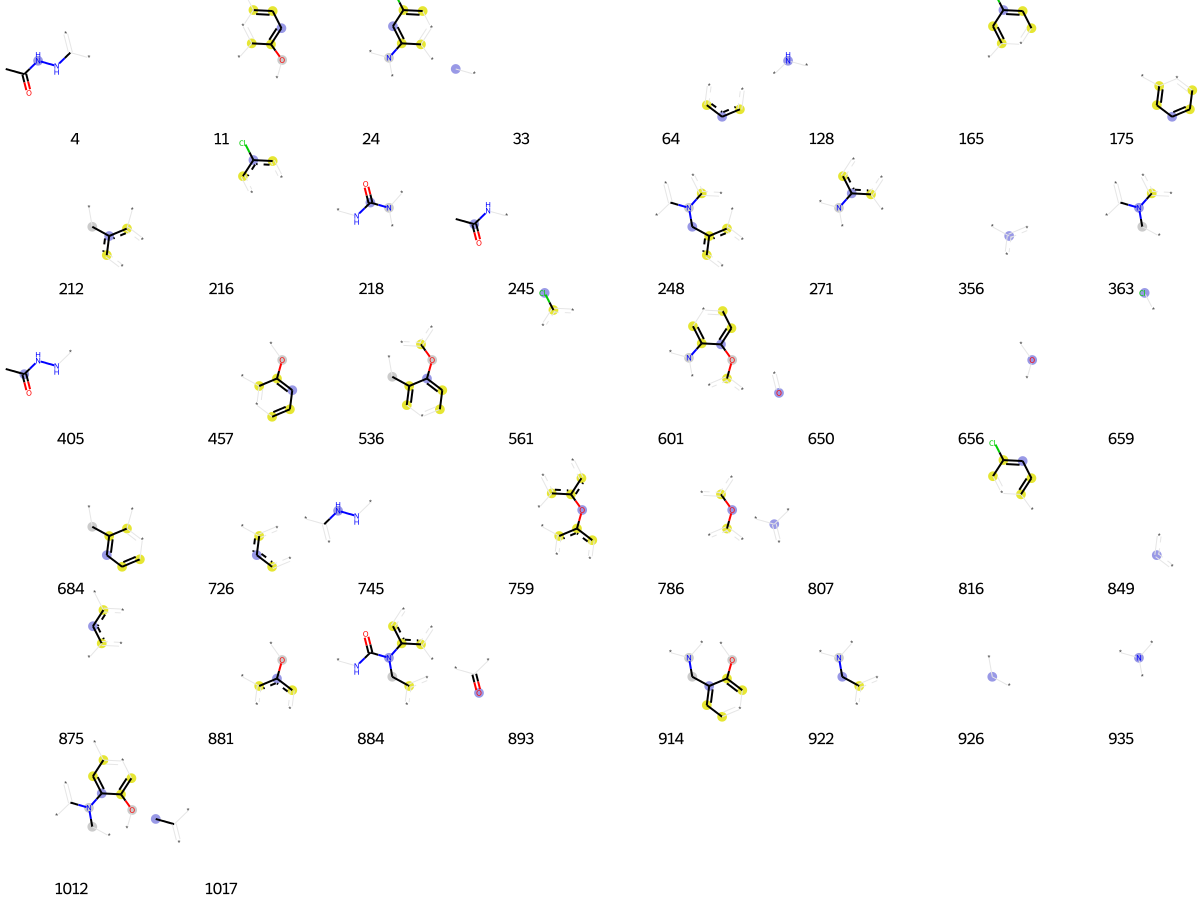

In [5271]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [5272]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[11,
 33,
 249,
 282,
 333,
 356,
 361,
 381,
 417,
 428,
 442,
 456,
 480,
 497,
 512,
 523,
 575,
 650,
 656,
 695,
 807,
 841,
 849,
 868,
 875,
 893,
 926,
 935,
 942,
 946,
 950,
 985]

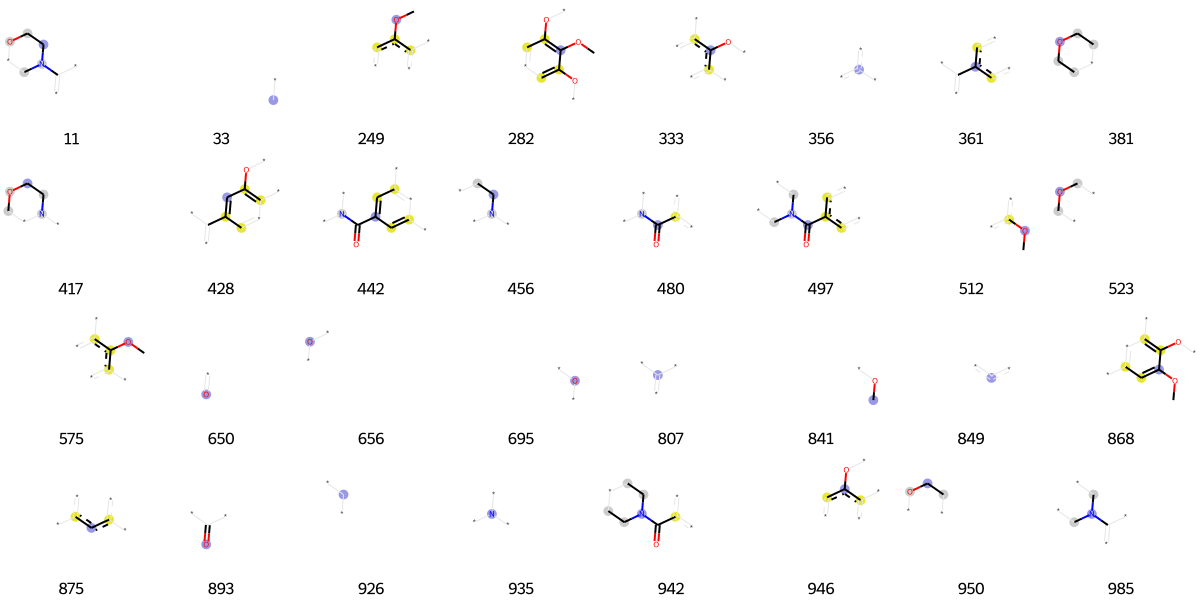

In [5273]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [5274]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[13,
 33,
 36,
 41,
 80,
 90,
 184,
 203,
 322,
 356,
 361,
 386,
 389,
 428,
 477,
 480,
 485,
 487,
 497,
 512,
 561,
 602,
 646,
 650,
 673,
 695,
 699,
 718,
 726,
 774,
 781,
 807,
 831,
 835,
 841,
 849,
 862,
 875,
 891,
 893,
 904,
 926,
 935,
 948,
 985,
 1011]

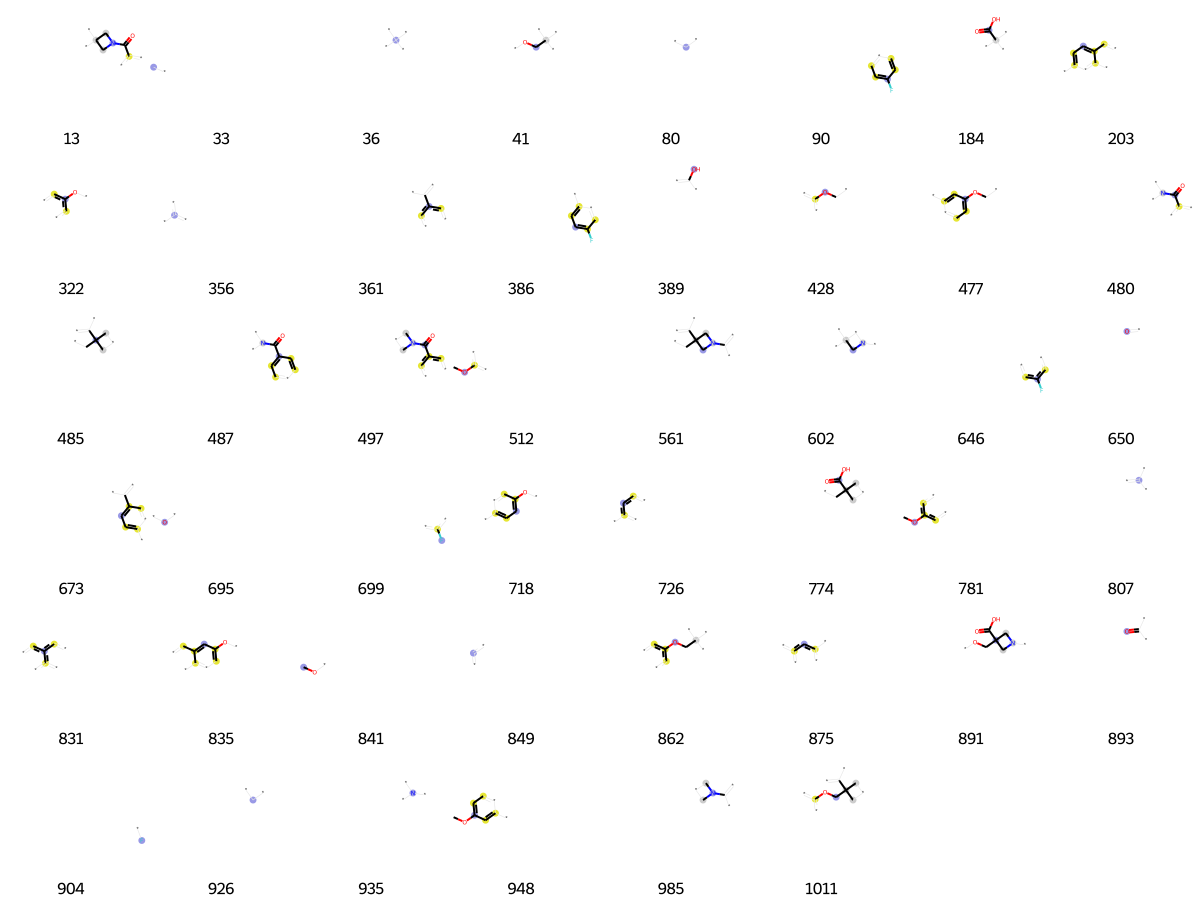

In [5275]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [5276]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 10,
 27,
 33,
 46,
 52,
 64,
 69,
 74,
 80,
 116,
 128,
 136,
 139,
 171,
 175,
 198,
 200,
 203,
 216,
 222,
 233,
 295,
 307,
 319,
 325,
 331,
 333,
 341,
 350,
 352,
 354,
 356,
 361,
 381,
 389,
 400,
 407,
 452,
 456,
 484,
 486,
 502,
 529,
 542,
 561,
 573,
 586,
 641,
 650,
 652,
 659,
 673,
 687,
 688,
 690,
 693,
 715,
 716,
 726,
 739,
 741,
 753,
 763,
 767,
 768,
 784,
 801,
 807,
 811,
 816,
 832,
 838,
 849,
 875,
 878,
 881,
 893,
 896,
 911,
 926,
 927,
 935,
 936,
 939,
 950,
 984]

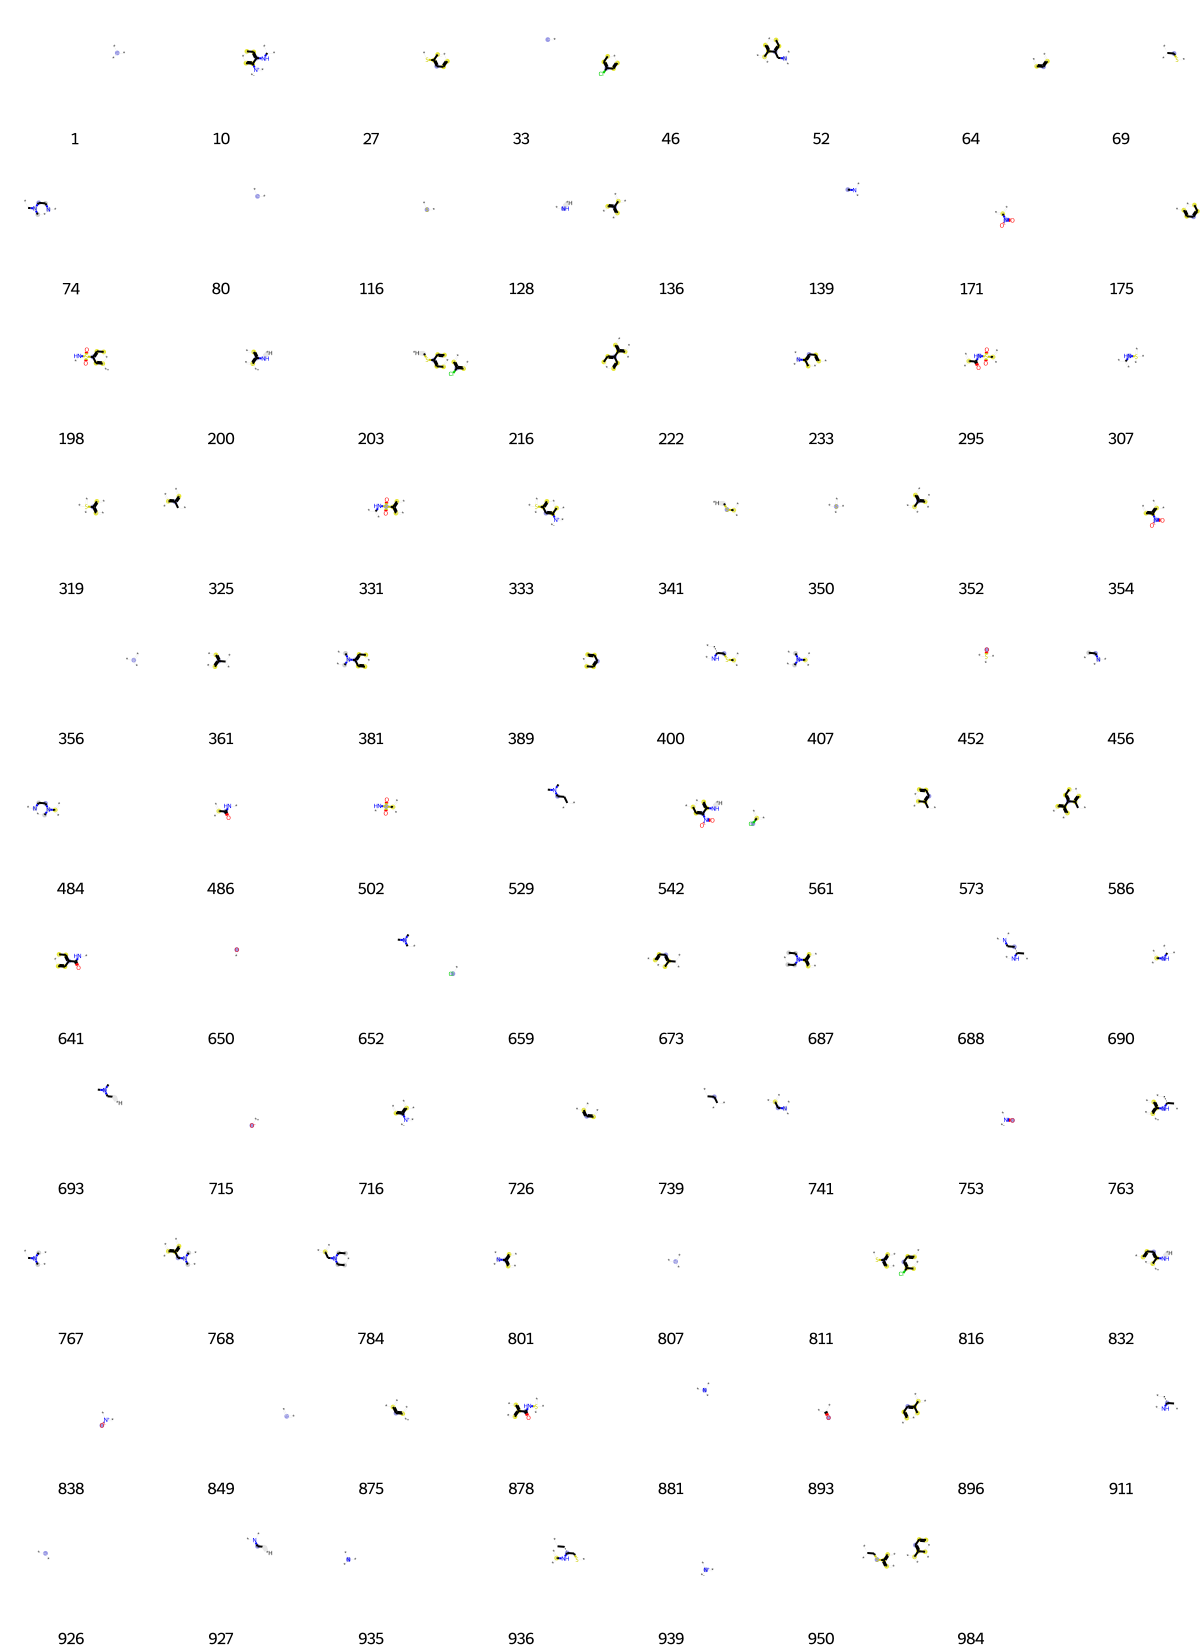

In [5277]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [5278]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[3,
 33,
 43,
 64,
 105,
 128,
 133,
 175,
 193,
 206,
 273,
 290,
 314,
 322,
 333,
 352,
 356,
 366,
 371,
 378,
 403,
 504,
 511,
 512,
 561,
 584,
 593,
 611,
 650,
 659,
 695,
 718,
 726,
 732,
 781,
 831,
 840,
 841,
 849,
 935,
 984,
 1019]

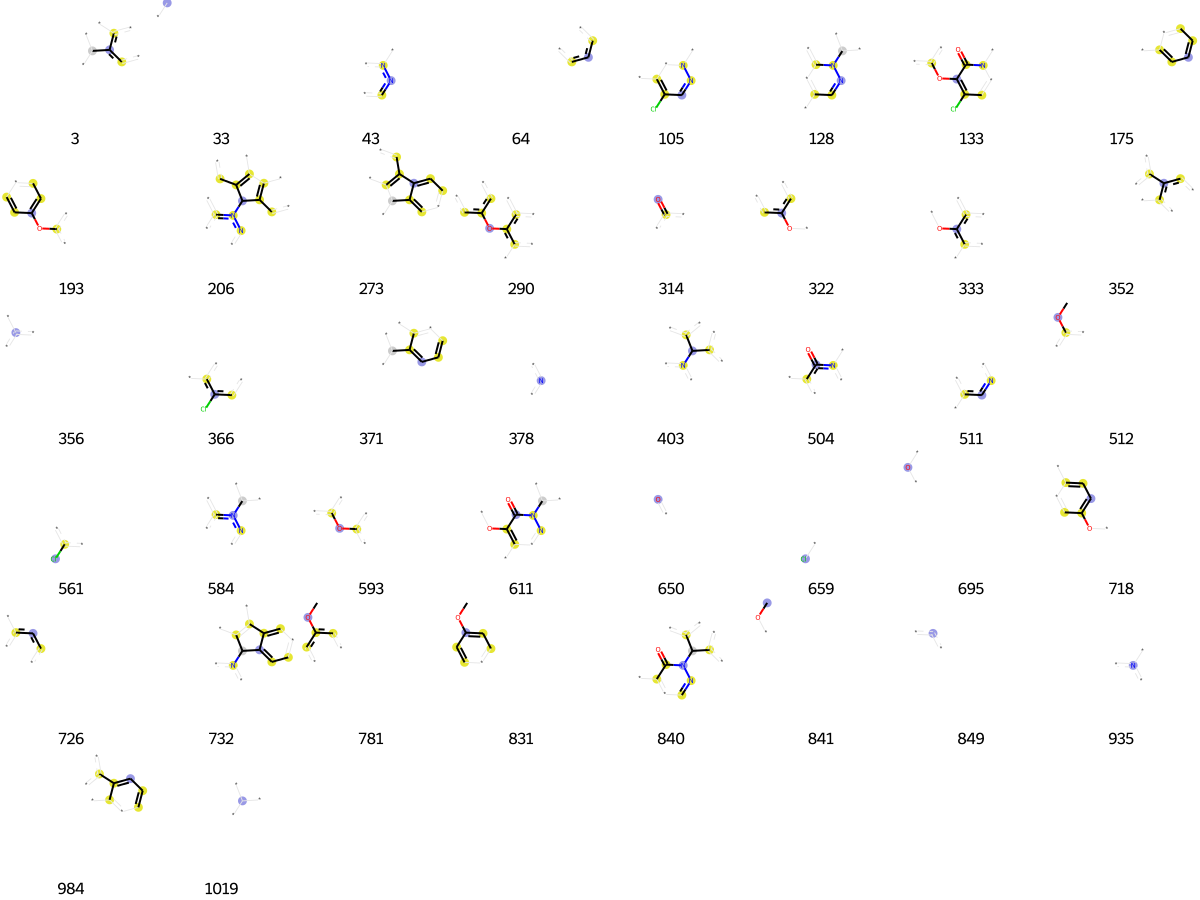

In [5279]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])